# enter model path

In [92]:
# path = '../log/geometric_graph/cube/checkpoints/best_model-step=14306.ckpt'
path = '../log/geometric_graph/grid/checkpoints/best_model-step=26783.ckpt'
# path = '../log/geometric_graph/torus/checkpoints/best_model-step=19563.ckpt'
# path = '../log/geometric_graph/trained on cluster/Grid2d-ss-bidirectional/checkpoints/best_model-step=3280.ckpt'
# path = '../log/geometric_graph/version_96/checkpoints/best_model-step=3081.ckpt'

# Works, also kinda persistent without training for it
# path = '../log/geometric_graph/-ds Grid2d -bsc 0 1 -l local -an -at undirected -ffa -ss -as corners/version_1/checkpoints/best_model-step=2367.ckpt'
# Already works, no persistence though
# path = '../log/geometric_graph/-ds Torus -bsc 0 1 -l local -an -ffa -at undirected -ss -uaf -as corners -ad 0.5/version_0/checkpoints/best_model-step=932.ckpt'
# Works, but somehow not persistent, even though it should be
# path = '../log/geometric_graph/-ds Torus -bsc 0 8 -l local -an -ffa -at undirected -ss -uaf -as corners -ad 0.5 -ric/version_2/checkpoints/best_model-step=6679.ckpt'
# Shows some semblance of a grid, but not really
# path = '../log/geometric_graph/-ds Grid2d -bsc 0 1 -l ot -ss -as corners -re -an -en 6 -ffa/version_0/checkpoints/best_model-step=18550.ckpt'
# Still wraps on itself sometimes :(
# path = '../log/geometric_graph/-ds Grid2d -bsc 0 1 2000 8 -l local -an -at undirected -ffa -ss -as corners -ric -uaf/version_0/checkpoints/best_model-step=3335.ckpt'

# with
# path = '../log/experiments/-ds Grid2d -bsc 0 1 -l local_enp -at undirected -an --seed 42/version_3/checkpoints/best_model-step=7919.ckpt'
# without; also enp
# path = '../log/experiments/-ds Grid2d -bsc 0 1 -l local -at undirected -an --seed 42/version_0/checkpoints/best_model-step=22819.ckpt'
# without, also enp
# path = '../log/experiments/-ds Grid2d -bsc 0 1 -l local -at undirected -an --seed 42/version_1/checkpoints/best_model-step=17016.ckpt'
# wrong random_initial_coordinates value; without
# path = '../log/experiments/-ds Grid2d -bsc 0 1 -l local -at undirected/version_0/checkpoints/best_model-step=23348.ckpt'


# path = 'D:/Onedrive/OneDrive - TU Eindhoven/Graduation Project/egnca/log/experiments/-ds Grid2d -bsc 0 1 -l ot_p -pd 0.35 -at undirected -an -ffa -ss -as corners -asc 1.5 -uaf --seed 123/version_0/checkpoints/best_model-step=13953.ckpt'
path = 'D:/Onedrive/OneDrive - TU Eindhoven/Graduation Project/egnca/log/experiments/-ds Grid2d -bsc 0 1 -l ot --seed 42/version_1/checkpoints/best_model-step=3450.ckpt'

In [21]:
# 127 works for grid with no persistence, not updating anchor feat, and reduced anchor edges
# version = 127
# 131 works kinda for grid with persistence, not updating anchor feat, and reduced anchor edges
# version = 131
# 135 works for grid with no persistence, angles, not updating anchor feat, and reduced anchor edges
# version = 135
# 136 works a bit for grid with persistence, angles, not updating anchor feat, and reduced anchor edges (trained too short probably)
# version = 136

## Local loss
# 205 surprisingly works for grid without persistance, with angles
# version = 205
# 208 does not work for grid without persistance, with angles
# version = 208

# 215 looks like it works, but grows increasingly small for cube without persistance, with angles
# version = 215

# test/111 works kinda (torus)
# test/112, test/106 works kinda (grid, dynamic, persistence, angles, ot with penalty)
# test/116 works kinda (x, dynamic, persistence, angles, ot with penalty)
# test/121 does not work (cube, dynamic, angles, ot with penalty)
# test/127 kinda works (cube, static, ot with penalty)
# test/128 cube, ric, not quite working (loss 0.040)

# test/142 shows that it is hard to escape from twisted/folded structure without dynamic edges
# Try with des 10? => 143

# version = -1

version = -1

# import packages and load model

In [3]:
import sys
sys.path.append('../')
import os
from importlib import reload

import models
import data.datasets as datasets
reload(models)
reload(datasets)

import pools
reload(pools)
import utils
reload(utils)
import utils.utils
reload(utils.utils)
import data
import data.datasets
reload(data)
reload(data.datasets)

from utils.visualize import coord2scatter, plot_edge_index, plot_trend
from utils.utils import coord_invariant_rec_loss, damage_coord, compute_edge_index, ot_assignment
import egnn
# reload(egnn)
from models import FixedTargetGAE

from pytorch_lightning.utilities.model_summary import ModelSummary
%matplotlib widget
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import torch

from tqdm.auto import tqdm


device = 'cpu'

# base_path = '../log/geometric_graph'
# base_path = '../log/experiments'
# base_path = '../log/test'
# base_path = '../log'
# base_path = '../log/results'
base_path = '../log/experiments-resultss'

if version is not None:
    if version < 0:
        files = os.listdir(base_path)
        files.sort(key=lambda x: os.path.getmtime(f'{base_path}/{x}'))
        path = f'{base_path}/{files[version]}'
        versions = os.listdir(path)
        versions.sort(key=lambda x: os.path.getmtime(f'{path}/{x}'))
        v = versions[-1]
        if v != 'checkpoints':
            path = f'{path}/{v}/checkpoints/'
        else:
            path = f'{path}/checkpoints/'
        path += os.listdir(path)[0]
    else:
        path = f'{base_path}/version_{version}/checkpoints/'
        file_name = os.listdir(path)[0]
        path += file_name
print(path)

model = FixedTargetGAE.load_from_checkpoint(path).to(device)
print(ModelSummary(model, max_depth=1))

NameError: name 'version' is not defined

In [319]:
%load_ext tensorboard
# %tensorboard --logdir "../log/experiments/-ds Grid2d -bsc 0 1 -l local_enp -at undirected -an --seed 42/version_3"
# %tensorboard --logdir "../log/experiments/-ds Grid2d -bsc 0 1 -l local -at undirected/version_0"

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [5]:
def set_diff_1d(t1, t2, assume_unique=False):
    """
    Set difference of two 1D tensors.
    Returns the unique values in t1 that are not in t2.

    """
    if not assume_unique:
        t1 = torch.unique(t1)
        t2 = torch.unique(t2)
    return t1[(t1[:, None] != t2).all(dim=1)]

def set_diff_2d(t1, t2, assume_unique=False):
    """
    Set difference of two 2D tensors.
    Returns the unique values in t1 that are not in t2.

    """
    if not assume_unique:
        t1 = torch.unique(t1, dim=0)
        t2 = torch.unique(t2, dim=0)
    return t1[(t1[:, None] != t2).any(dim=2).all(dim=1)]

t1 = torch.tensor([[1, 2], [3, 4], [5, 6], [7, 8], [1, 3]])
t2 = torch.tensor([[1, 2], [3, 4], [5, 6], [9, 10], [2, 3]])
print(set_diff_2d(t1, t2))

tensor([[1, 3],
        [7, 8]])


In [6]:
t1.shape

torch.Size([5, 2])

In [63]:
model.random_init_coord

True

In [93]:
res = ot_assignment(init_coord, model.target_coord, pb=True)

In [68]:
res1 = ot_assignment(init_coord, model.target_coord, pb=True)

In [69]:
res1

EdgeIndex([[  0,   0,   0,  ..., 255, 255, 255],
           [ 26, 102, 117,  ..., 138, 155, 172]], nnz=1169)

In [7]:
close_edge_index = compute_edge_index(None, model.target_coord, torch.LongTensor([model.init_coord.shape[0]]), True, False, distance=0.25)
edge_index.shape, close_edge_index.shape

NameError: name 'edge_index' is not defined

In [ ]:
print(set_diff_2d(close_edge_index.T, edge_index.T).shape)
print(set_diff_2d(edge_index.T, close_edge_index.T).shape)

torch.Size([0, 2])
torch.Size([0, 2])


## notebook utils

In [5]:
from utils.utils import local_loss, sliced_ot_loss, ot_assignment


box_dim = 1.0

coord_dim = model.encoder.coord_dim

def get_title(time_step, coord = None, edge_index = None):
    if edge_index is None:
        edge_index = model.edge_index
    title = '$t=%d$' % time_step
    if coord is not None:
        if model.loss_fn == 'local' or model.loss_fn == 'local_enp':
            loss = coord_invariant_rec_loss(coord, model.target_coord)
            dist_loss, angle_loss, nb_loss = local_loss(coord, model.target_coord, edge_index)
            title += '$\quad \mathcal{L}_{\mathsf{INV}}=%.5f; \mathcal{L}_{local}=%.5f + %5f + %5f = %5f$' % (loss, dist_loss, angle_loss, nb_loss, dist_loss + angle_loss + nb_loss)
        elif model.loss_fn == 'ot' or model.loss_fn == 'ot_p':
            loss_ot, penalty = sliced_ot_loss(coord, model.target_coord, penalty=model.loss_fn == 'ot_p', edge_index=edge_index, penalty_dist=model.penalty_distance)
            title += '$\quad \mathcal{L}_{\mathsf{OT}}=%.5f + %5f = %5f$' % (loss_ot, penalty, loss_ot + penalty)
    return title

# initial and target geometric graphs

In [9]:
model.random_init_coord

True

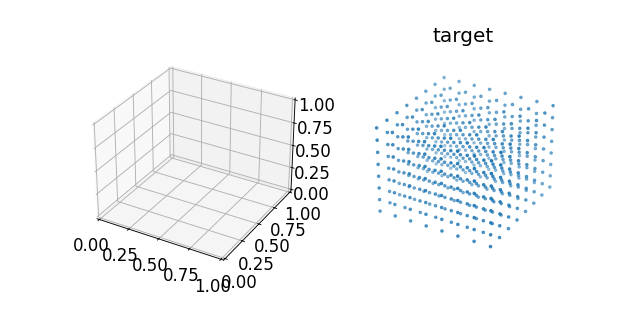

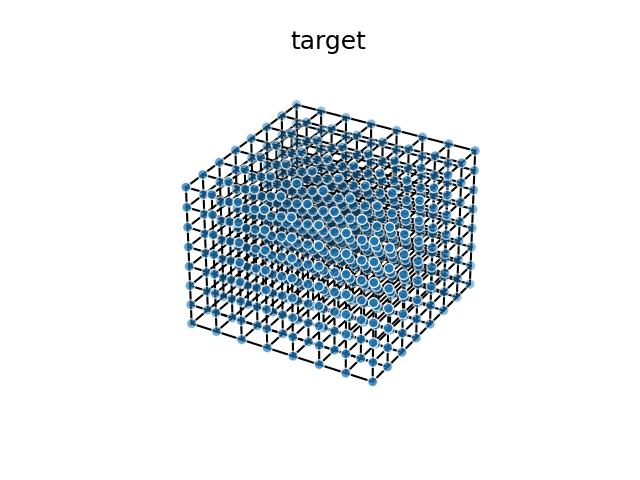

In [18]:
fig = plt.figure(figsize=(8, 4), dpi=80)
fig.tight_layout()

ax1 = fig.add_subplot(121, projection='3d' if coord_dim == 3 else None)
ax2 = fig.add_subplot(122, projection='3d' if coord_dim == 3 else None)

relative_edges = model.relative_edges
# edge_index = compute_edge_index(model.edge_index, model.init_coord, torch.LongTensor([model.init_coord.shape[0]]), relative_edges, False, distance=model.edge_distance, n_neighbours=model.edge_num, min_neighbours=model.min_edges)
# target_edge_index = compute_edge_index(model.edge_index, model.target_coord, torch.LongTensor([model.target_coord.shape[0]]), relative_edges, False, distance=model.edge_distance, n_neighbours=model.edge_num, min_neighbours=model.min_edges)
target_edge_index = compute_edge_index(model.edge_index, model.target_coord, torch.LongTensor([model.target_coord.shape[0]]), True, False, distance=0.2, n_neighbours=14, min_neighbours=None)
# edge_index = model.edge_index
# edge_index = ot_assignment(model.init_coord, model.target_coord, pb=True)

# coord2scatter(model.init_coord, title=get_title(0, model.init_coord), transparent=True, ax=ax1, zero_center=False, show_anchors=True, n_anchors=model.encoder.anchor_feat.size(0))
# plot_edge_index(edge_index, coord=model.init_coord, title=get_title(0, model.init_coord), ax=ax1)
# coord2scatter(model.target_coord, title='target', transparent=True, ax=ax2, zero_center=False, show_anchors=True, n_anchors=model.encoder.anchor_feat.size(0))
coord2scatter(model.target_coord, title='target', transparent=True, ax=ax2, zero_center=False)#, show_anchors=True, anchor_coords=model.encoder.anchor_coords)
plot_edge_index(target_edge_index, coord=model.target_coord, title='target')

In [186]:
model.encoder.egnn.layers[0].use_angles

False

In [116]:
model.encoder.anchor_coords

tensor([[ 1.0000e+00,  5.0000e-01,  1.4645e-01],
        [-2.9802e-08,  5.0000e-01,  1.4645e-01],
        [ 5.0000e-01,  1.0000e+00,  8.5355e-01],
        [ 5.0000e-01, -2.9802e-08,  8.5355e-01]])

In [167]:
print(model.encoder.anchor_coords.min(), model.encoder.anchor_coords.max())
ac = model.encoder.anchor_coords.clone()
ac = ac / ((ac.max() - ac.min()) / (model.target_coord.max() - model.target_coord.min()))
ac = ac + model.target_coord.mean()
print(ac.min(), ac.max())

tensor(-2.9802e-08) tensor(1.)
tensor(0.5000) tensor(1.5000)


In [99]:
model.target_coord.min(), model.target_coord.max()

(tensor(0.), tensor(1.))

In [171]:
(target_edge_index[0] == target_edge_index[1]).any()

tensor(False)

In [174]:
(model.target_coord[target_edge_index[0]] - model.target_coord[target_edge_index[1]] == 0)

tensor([[ True,  True, False],
        [False,  True,  True],
        [False,  True, False],
        ...,
        [False,  True, False],
        [False,  True,  True],
        [ True,  True, False]])

In [334]:
target_edge_index_2 = compute_edge_index(model.edge_index, model.target_coord, torch.LongTensor([model.init_coord.shape[0]]), True, False, distance=0.2, n_neighbours=6, min_neighbours=3)
print((target_edge_index == model.edge_index).all())
dist = torch.norm(model.target_coord[target_edge_index_2[0]] - model.target_coord[target_edge_index_2[1]], dim=-1)
dist.min(), dist.mean(), dist.max(), dist.unique()

tensor(True)


(tensor(0.1429, dtype=torch.float64),
 tensor(0.1429, dtype=torch.float64),
 tensor(0.1429, dtype=torch.float64),
 tensor([0.1429, 0.1429, 0.1429, 0.1429, 0.1429], dtype=torch.float64))

In [7]:
dist = torch.norm(model.target_coord[target_edge_index[0]] - model.target_coord[target_edge_index[1]], dim=-1)
dist.min(), dist.mean(), dist.max(), dist.unique()

(tensor(0.2169, dtype=torch.float64),
 tensor(0.2169, dtype=torch.float64),
 tensor(0.2169, dtype=torch.float64),
 tensor([0.2169, 0.2169, 0.2169, 0.2169, 0.2169, 0.2169], dtype=torch.float64))

In [184]:
indices = list(range(model.init_coord.size(0) - model.encoder.anchor_feat.size(0)))
pairs = list(zip(indices, model.init_coord))
sorted_pairs = sorted(pairs, key=lambda x: (x[1][1] * 1).round(decimals=1))
sorted_pairs = sorted(sorted_pairs, key=lambda x: (x[1][0] * 1).round(decimals=1))
sorted_indices = [x[0] for x in sorted_pairs] + list(range(model.init_coord.size(0) - model.encoder.anchor_feat.size(0), model.init_coord.size(0)))

AttributeError: 'NoneType' object has no attribute 'size'

In [67]:
for i in range(10):
    print(sorted_pairs[i])

(76, tensor([-1.5521e+00,  9.1032e-04], dtype=torch.float64))
(190, tensor([-1.3574,  0.5916], dtype=torch.float64))
(56, tensor([-1.2384, -0.0131], dtype=torch.float64))
(116, tensor([-1.1797,  0.3446], dtype=torch.float64))
(57, tensor([-1.0884, -0.6628], dtype=torch.float64))
(195, tensor([-1.0676, -0.0984], dtype=torch.float64))
(217, tensor([-1.0963,  0.3484], dtype=torch.float64))
(127, tensor([-0.9833, -0.2525], dtype=torch.float64))
(183, tensor([-0.8922, -0.1302], dtype=torch.float64))
(230, tensor([-0.8763, -0.0566], dtype=torch.float64))


In [69]:
print(model.init_coord.shape)
print(model.init_coord[sorted_indices].shape)

torch.Size([260, 2])
torch.Size([260, 2])


In [70]:
model.edge_index[:, :5]

EdgeIndex([[ 0,  0,  1,  1,  1],
           [ 1, 16,  0,  2, 17]], nnz=5)

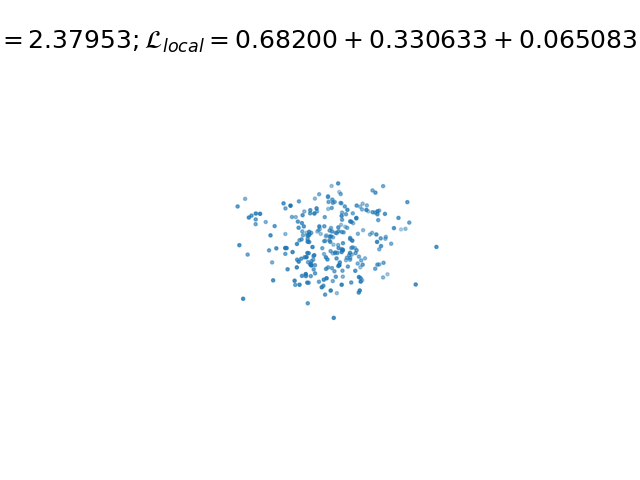

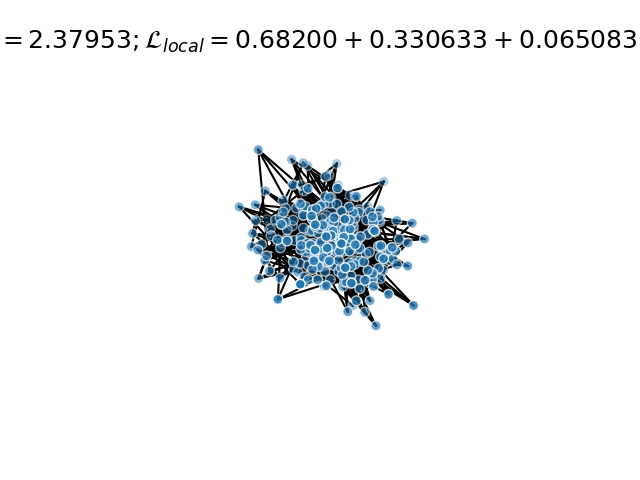

In [183]:
coord2scatter(model.init_coord[sorted_indices], title=get_title(0, model.init_coord[sorted_indices]), transparent=True, zero_center=False)
plot_edge_index(model.edge_index, coord=model.init_coord[sorted_indices], title=get_title(0, model.init_coord[sorted_indices]))

In [204]:
reload(data.datasets)
from data.datasets import create_cube_cloud, get_geometric_graph
from utils.utils import get_anchor_coords


cube_anchor_coords = get_anchor_coords("corners", 3, scale=1)
# coord, edge_index, cube_anchor_coords = create_cube_cloud(anchor_coords=cube_anchor_coords, anchor_dist=0.15)
coord, edge_index, _ = get_geometric_graph('Bunny')

print(cube_anchor_coords.min(), cube_anchor_coords.max())
print(coord[:-cube_anchor_coords.size(0)].min(), coord[:-cube_anchor_coords.size(0)].max())

dist = torch.norm(coord[edge_index[0]] - coord[edge_index[1]], dim=-1)
dist.min(), dist.mean(), dist.max(), dist.unique()

tensor(-1.) tensor(1.)
tensor(-2.4488) tensor(2.1887)


(tensor(0.0262),
 tensor(0.3418),
 tensor(0.6347),
 tensor([0.0262, 0.0270, 0.0304,  ..., 0.6315, 0.6336, 0.6347]))

In [210]:
edge_index[0].unique(return_counts=True)[1].unique(return_counts=True)

(tensor([13, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
         36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
         54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
         72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
         92, 97]),
 tensor([  1,   2,   2,   7,   1,   6,   1,   1,   4,   5,   3,  10,  13,  16,
          15,  20,  15,  25,  20,  18,  26,  46,  41,  60,  63,  71,  79,  81,
         101,  91, 103, 108,  96,  99,  97, 103,  90,  97,  83,  79,  79,  72,
          66,  45,  55,  35,  27,  36,  30,  13,  20,  20,  23,  20,  18,  15,
          15,  15,  12,   8,  12,   8,   8,  16,   7,   5,   7,   2,   5,   4,
           3,   1,   1,   1]))

In [23]:
dist.shape, edge_index.shape

(torch.Size([2882, 2]), torch.Size([2, 2882]))

In [34]:
dist[0]

tensor(0.1041)

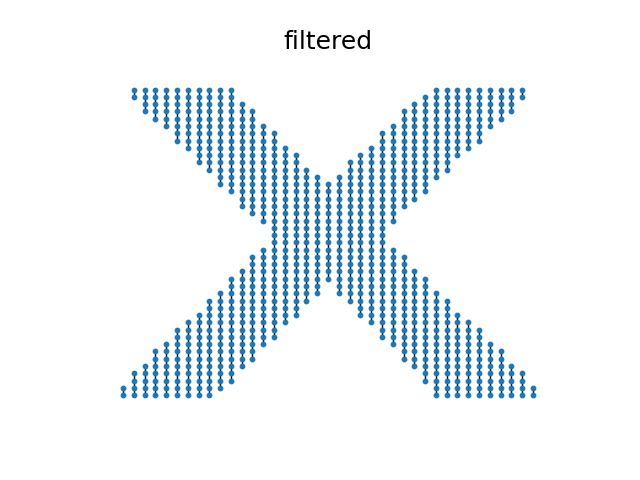

In [75]:
dist[dist<0.1].shape[0] / dist[dist>0.1].shape[0]
filtered_edges = edge_index[:, dist < 0.1]
plot_edge_index(filtered_edges, target_coord, title='filtered', node_size=10)

tensor(-2.1320) tensor(2.1320)


(tensor(0.1664),
 tensor(0.4741),
 tensor(0.8319),
 tensor([0.1664, 0.1917, 0.2638, 0.3436, 0.3436, 0.3436, 0.3436, 0.3718, 0.3718,
         0.4129, 0.4129, 0.4129, 0.4946, 0.4946, 0.4946, 0.4991, 0.4991, 0.5451,
         0.6265, 0.6265, 0.7344, 0.7344, 0.8065, 0.8319, 0.8319]))

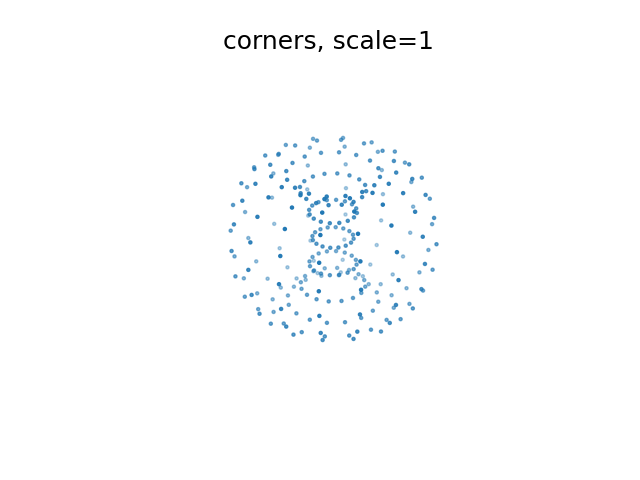

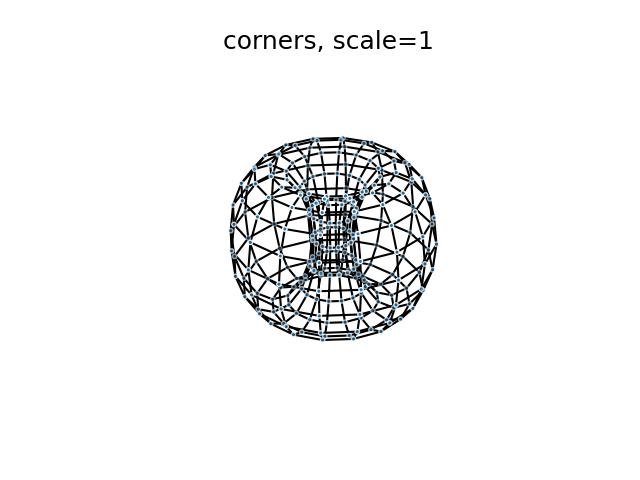

In [6]:
from data.datasets import get_geometric_graph

target_coord, edge_index, anchor_coords = get_geometric_graph("Torus")#, anchor_structure='corners', anchor_dist=0.15, anchor_scale=1)
coord2scatter(target_coord, title='corners, scale=1', transparent=True, zero_center=False)#, show_anchors=True, n_anchors=anchor_coords.size(0))
plot_edge_index(edge_index, coord=target_coord, title='corners, scale=1', node_size=10)

print(target_coord.min(), target_coord.max())
# print(anchor_coords.min(), anchor_coords.max())
# print(edge_index[0][edge_index[0] >= (target_coord.size(0) - anchor_coords.size(0))].unique())

dist = torch.norm(target_coord[edge_index[0]] - target_coord[edge_index[1]], dim=-1)
dist.min(), dist.mean(), dist.max(), dist.unique()

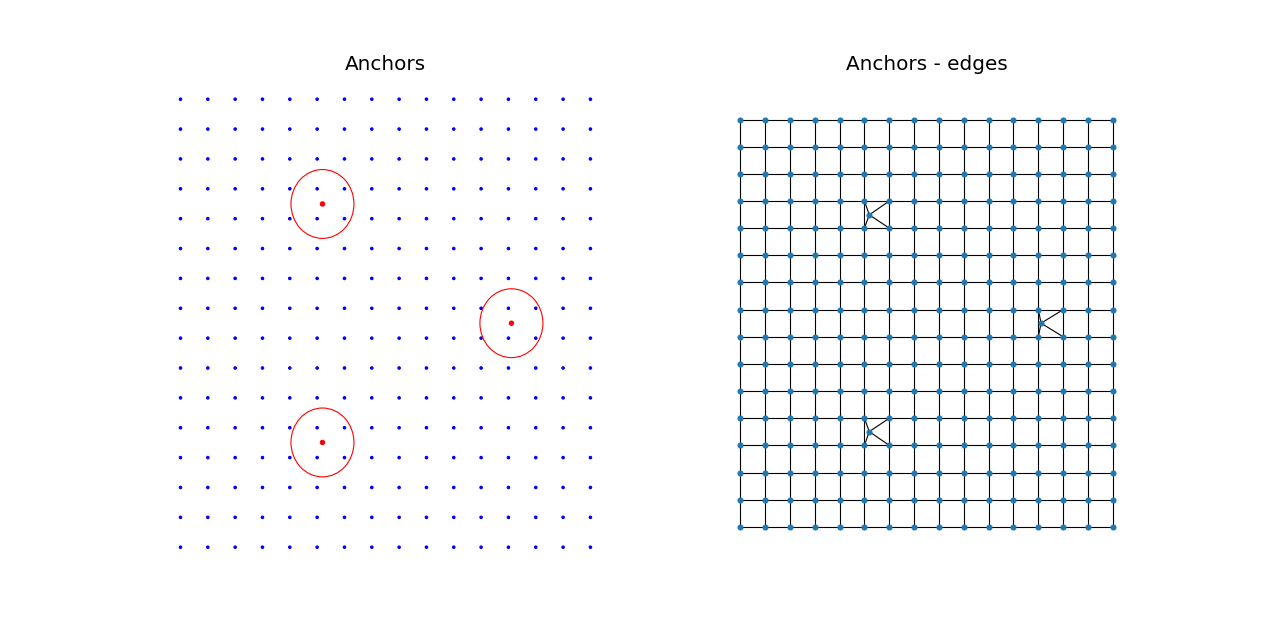

In [54]:
fig = plt.figure(figsize=(16, 8), dpi=80)
fig.tight_layout

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

target_coord, edge_index, anchor_coords = get_geometric_graph(graph, anchor_structure='simplex', anchor_dist=0.25, anchor_scale=1)
coord2scatter(target_coord, title='Anchors', ax=ax1, transparent=True, zero_center=False, show_anchors=True, n_anchors=anchor_coords.size(0))

for i, anchor_coord in enumerate(anchor_coords):
    circle = plt.Circle(anchor_coord, 0.25, color='r', fill=False)
    ax1.add_artist(circle)

plot_edge_index(edge_index, coord=target_coord, title='Anchors - edges', ax=ax2, node_size=20)

fig.savefig('anchors.png')

In [213]:
get_geometric_graph('x')[0].shape

torch.Size([791, 2])

In [17]:
import utils.visualize


reload(utils.visualize)
from utils.visualize import plot_edge_index, coord2scatter

C:\Users\20191934\AppData\Local\Temp\ipykernel_19984\2960780385.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(16, 8), dpi=80)


tensor(0.0337) tensor(0.2155) tensor(0.2419) tensor([0.0337, 0.1946, 0.2169, 0.2169, 0.2169, 0.2169, 0.2169, 0.2419])
tensor([[-1., -1.],
        [ 1., -1.],
        [-1.,  1.],
        [ 1.,  1.]])
tensor(-1.6270) tensor(1.6270)


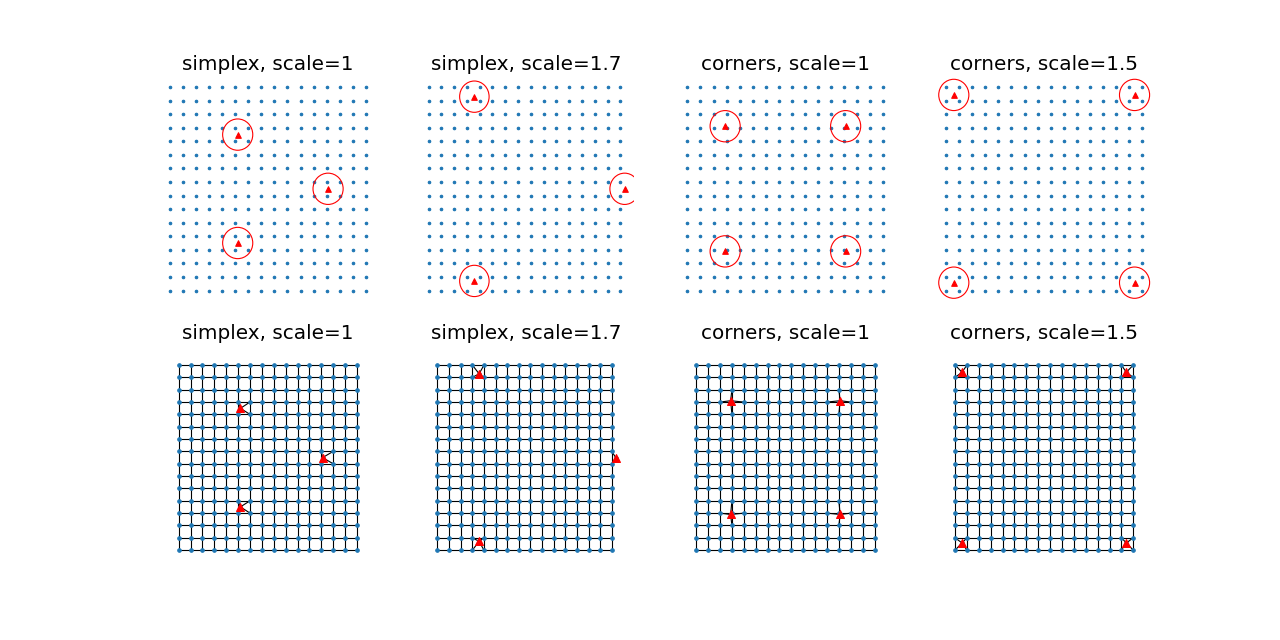

In [19]:
from data.datasets import get_geometric_graph


fig = plt.figure(figsize=(16, 8), dpi=80)
fig.tight_layout()

graph = 'Grid2d'
coord_dim = 2

ax1 = fig.add_subplot(241, projection='3d' if coord_dim == 3 else None)
ax2 = fig.add_subplot(242, projection='3d' if coord_dim == 3 else None)
ax3 = fig.add_subplot(243, projection='3d' if coord_dim == 3 else None)
ax4 = fig.add_subplot(244, projection='3d' if coord_dim == 3 else None)
ax5 = fig.add_subplot(245, projection='3d' if coord_dim == 3 else None)
ax6 = fig.add_subplot(246, projection='3d' if coord_dim == 3 else None)
ax7 = fig.add_subplot(247, projection='3d' if coord_dim == 3 else None)
ax8 = fig.add_subplot(248, projection='3d' if coord_dim == 3 else None)


target_coord, edge_index, anchor_coords = get_geometric_graph(graph, anchor_structure='simplex', anchor_dist=0.25, anchor_scale=1)
coord2scatter(target_coord, title='simplex, scale=1', ax=ax1, transparent=True, zero_center=False, show_anchors=True, n_anchors=anchor_coords.size(0))

for i, anchor_coord in enumerate(anchor_coords):
    circle = plt.Circle(anchor_coord, 0.25, color='r', fill=False)
    ax1.add_artist(circle)

plot_edge_index(edge_index, coord=target_coord, title='simplex, scale=1', ax=ax5, node_size=10, anchor_coords=anchor_coords)

target_coord, edge_index, anchor_coords = get_geometric_graph(graph, anchor_structure='simplex', anchor_dist=0.25, anchor_scale=1.7)
coord2scatter(target_coord, title='simplex, scale=1.7', ax=ax2, transparent=True, zero_center=False, show_anchors=True, n_anchors=anchor_coords.size(0))

for i, anchor_coord in enumerate(anchor_coords):
    circle = plt.Circle(anchor_coord, 0.25, color='r', fill=False)
    ax2.add_artist(circle)

plot_edge_index(edge_index, coord=target_coord, title='simplex, scale=1.7', ax=ax6, node_size=10, anchor_coords=anchor_coords)

target_coord, edge_index, anchor_coords = get_geometric_graph(graph, anchor_structure='corners', anchor_dist=0.25, anchor_scale=1.0)
coord2scatter(target_coord, title='corners, scale=1', ax=ax3, transparent=True, zero_center=False, show_anchors=True, n_anchors=anchor_coords.size(0))

for i, anchor_coord in enumerate(anchor_coords):
    circle = plt.Circle(anchor_coord, 0.25, color='r', fill=False)
    ax3.add_artist(circle)

plot_edge_index(edge_index, coord=target_coord, title='corners, scale=1', ax=ax7, node_size=10, anchor_coords=anchor_coords)

dist = torch.norm(target_coord[edge_index[0]] - target_coord[edge_index[1]], dim=-1)
print(dist.min(), dist.mean(), dist.max(), dist.unique())
print(anchor_coords)
print(target_coord.min(), target_coord.max())

target_coord, edge_index, anchor_coords = get_geometric_graph(graph, anchor_structure='corners', anchor_dist=0.25, anchor_scale=1.5)
coord2scatter(target_coord, title='corners, scale=1.5', ax=ax4, transparent=True, zero_center=False, show_anchors=True, n_anchors=anchor_coords.size(0))

for i, anchor_coord in enumerate(anchor_coords):
    circle = plt.Circle(anchor_coord, 0.25, color='r', fill=False)
    ax4.add_artist(circle)

plot_edge_index(edge_index, coord=target_coord, title='corners, scale=1.5', ax=ax8, node_size=10, anchor_coords=anchor_coords)

# target_coord, edge_index, anchor_coords = get_geometric_graph(graph, anchor_structure='2corners', anchor_dist=0.25, anchor_scale=1.0)
# coord2scatter(target_coord, title='2 corners, scale=1', ax=ax5, transparent=True, zero_center=False, show_anchors=True, n_anchors=anchor_coords.size(0))

# target_coord, edge_index, anchor_coords = get_geometric_graph(graph, anchor_structure='2corners', anchor_dist=0.25, anchor_scale=1.5)
# coord2scatter(target_coord, title='2 corners, scale=1.5', ax=ax6, transparent=True, zero_center=False, show_anchors=True, n_anchors=anchor_coords.size(0))

In [19]:
reload(utils.visualize)
from utils.visualize import coord2scatter

In [41]:
import matplotlib
matplotlib.pyplot.close()

tensor(0.4304)
tensor([[ 1.0000, -0.0043],
        [ 0.0043,  1.0000]])


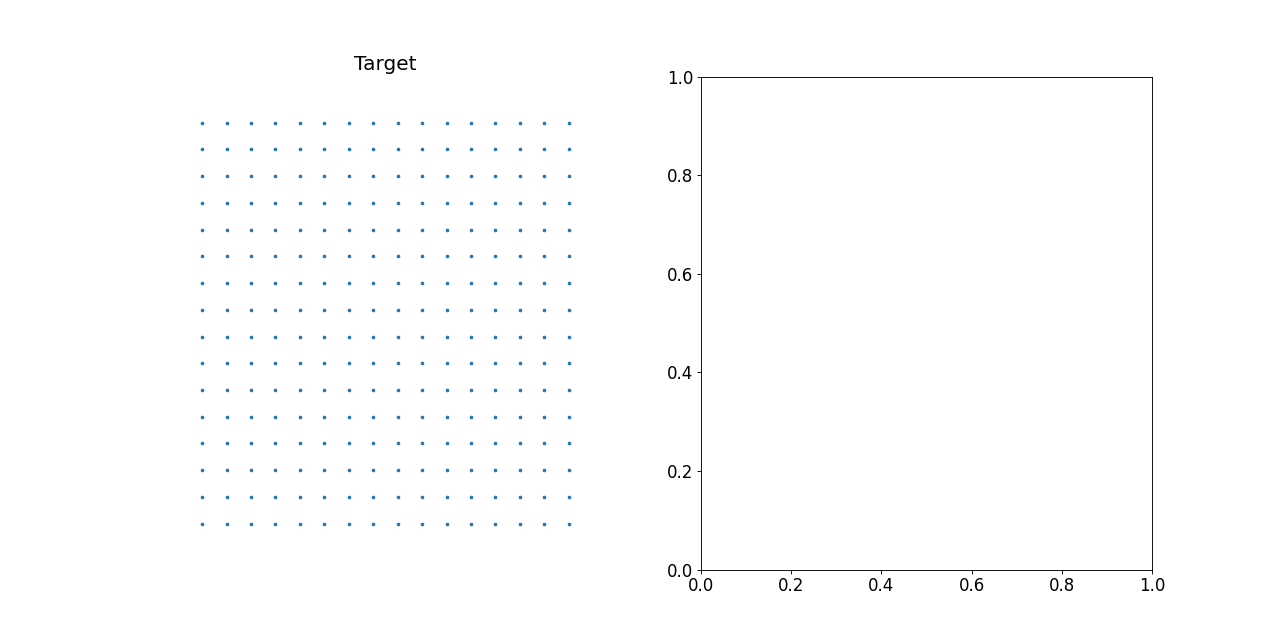

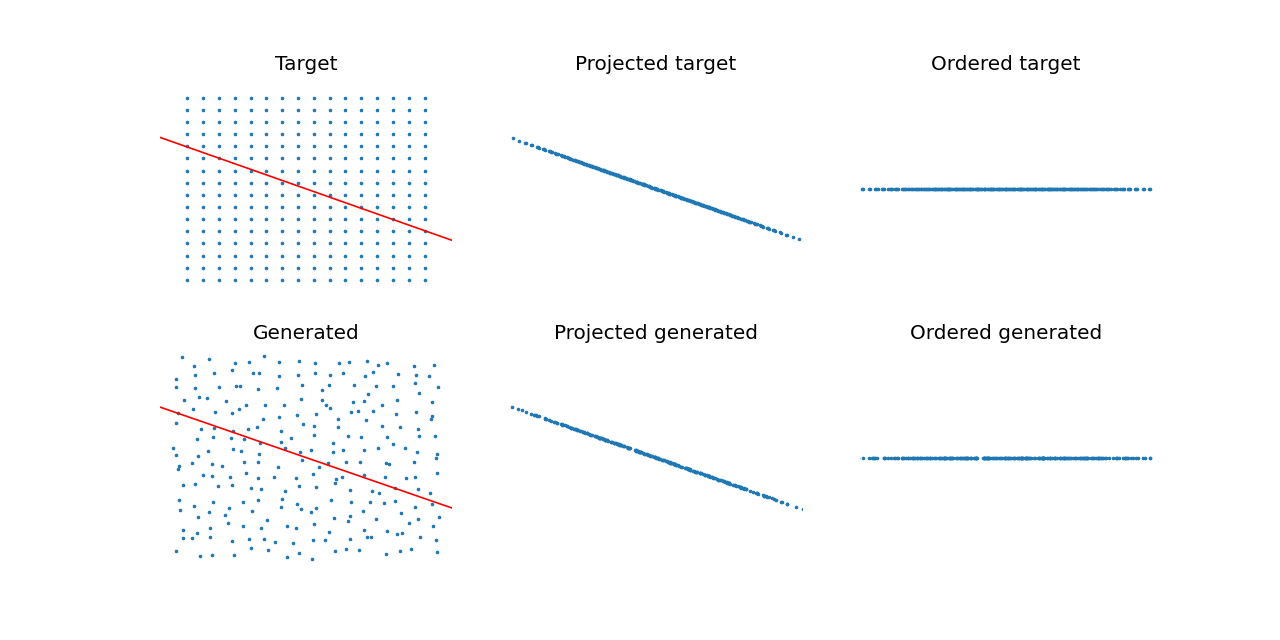

8
9
10
11
12
13
14
15
16
17
18
tensor(0.4304)
tensor([[ 0.9088, -0.4172],
        [ 0.4172,  0.9088]])
tensor(0.3443)
tensor([[ 0.9413, -0.3376],
        [ 0.3376,  0.9413]])
tensor(0.2582)
tensor([[ 0.9668, -0.2554],
        [ 0.2554,  0.9668]])
tensor(0.1722)
tensor([[ 0.9852, -0.1713],
        [ 0.1713,  0.9852]])
tensor(0.0861)
tensor([[ 0.9963, -0.0860],
        [ 0.0860,  0.9963]])
tensor(0.)
tensor([[1., -0.],
        [0., 1.]])


In [13]:
fig = plt.figure(figsize=(16, 8), dpi=80)
fig.tight_layout()

graph = 'Grid2d'
coord_dim = 2
box_dim = 2

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

fig_imgs = plt.figure(figsize=(16, 8), dpi=80)
fig_imgs.tight_layout()

ax1_img = fig_imgs.add_subplot(231)
ax2_img = fig_imgs.add_subplot(232)
ax3_img = fig_imgs.add_subplot(233)
ax4_img = fig_imgs.add_subplot(234)
ax5_img = fig_imgs.add_subplot(235)
ax6_img = fig_imgs.add_subplot(236)

# ax1 = fig.add_subplot(241, projection='3d' if coord_dim == 3 else None)
# ax2 = fig.add_subplot(242, projection='3d' if coord_dim == 3 else None)
# ax3 = fig.add_subplot(243, projection='3d' if coord_dim == 3 else None)
# ax4 = fig.add_subplot(244, projection='3d' if coord_dim == 3 else None)
# ax5 = fig.add_subplot(245, projection='3d' if coord_dim == 3 else None)
# ax6 = fig.add_subplot(246, projection='3d' if coord_dim == 3 else None)
# ax7 = fig.add_subplot(247, projection='3d' if coord_dim == 3 else None)
# ax8 = fig.add_subplot(248, projection='3d' if coord_dim == 3 else None)

anchor_colors = ['y', 'r', 'g']

target_coord, edge_index, anchor_coords = get_geometric_graph(graph, anchor_structure=None)#'simplex', anchor_dist=0.25, anchor_scale=1)
anchor_coords = torch.Tensor([])
coord2scatter(target_coord, title='Target', ax=ax1, transparent=True, zero_center=False, show_anchors=False, n_anchors=anchor_coords.size(0), anchor_colors=anchor_colors, box_dim=box_dim)
coord2scatter(target_coord, title='Target', ax=ax1_img, transparent=True, zero_center=False, show_anchors=False, n_anchors=anchor_coords.size(0), anchor_colors=anchor_colors, box_dim=box_dim)
damaged_coord = damage_coord(target_coord, 0.05)
alpha = torch.tensor(torch.pi / 4)
rotation = torch.tensor([[torch.cos(alpha), -torch.sin(alpha)], [torch.sin(alpha), torch.cos(alpha)]])
rot_damaged_coord = torch.matmul(damaged_coord, rotation)
# damaged_coord[:, 0] *= -1
coord2scatter(damaged_coord, title='Generated', ax=ax4_img, transparent=True, zero_center=False, show_anchors=False, n_anchors=anchor_coords.size(0), anchor_colors=anchor_colors)

# projection = torch.nn.functional.normalize(torch.randn(1, coord_dim, 1, dtype=target_coord.dtype).to(target_coord.device), dim=1)
ax1_img.plot([-projection[0, 0, 0] * 10, projection[0, 0, 0] * 10], [-projection[0, 1, 0] * 10, projection[0, 1, 0] * 10], color='r', scalex=False, scaley=False)
ax4_img.plot([-projection[0, 0, 0] * 10, projection[0, 0, 0] * 10], [-projection[0, 1, 0] * 10, projection[0, 1, 0] * 10], color='r', scalex=False, scaley=False)

# ax8.plot([0, projection[0, 0, 0] * 10], [0, projection[0, 1, 0] * 10], color='r', scalex=False, scaley=False)
projected_target = torch.matmul(target_coord, projection)#.squeeze()
projected_damaged = torch.matmul(damaged_coord, projection)#.squeeze()

# add an extra entry in dimension -1, to make it 2D. set the coordinate to 0
projected_target = torch.cat((projected_target, torch.zeros_like(projected_target[:, :, :1])), dim=-1).squeeze()
projected_damaged = torch.cat((projected_damaged, torch.zeros_like(projected_damaged[:, :, :1])), dim=-1).squeeze()

coord2scatter(projected_target, title='Ordered target', ax=ax3_img, transparent=True, zero_center=False, show_anchors=False, n_anchors=anchor_coords.size(0), anchor_colors=anchor_colors, box_dim=box_dim)
coord2scatter(projected_damaged, title='Ordered generated', ax=ax6_img, transparent=True, zero_center=False, show_anchors=False, n_anchors=anchor_coords.size(0), anchor_colors=anchor_colors, box_dim=box_dim)

projection_angle = torch.acos(torch.matmul(projection.squeeze(), torch.tensor([1, 0], dtype=projection.dtype, device=projection.device)))
print(projection_angle)
projection_rotation = torch.tensor([[torch.cos(projection_angle), -torch.sin(projection_angle)], [torch.sin(projection_angle), torch.cos(projection_angle)]])
rot_projected_target = torch.matmul(projected_target, projection_rotation)
rot_projected_damaged = torch.matmul(projected_damaged, projection_rotation)

coord2scatter(rot_projected_target, title='Projected target', ax=ax2_img, transparent=True, zero_center=False, show_anchors=False, n_anchors=anchor_coords.size(0), anchor_colors=anchor_colors, box_dim=box_dim)
coord2scatter(rot_projected_damaged, title='Projected generated', ax=ax5_img, transparent=True, zero_center=False, show_anchors=False, n_anchors=anchor_coords.size(0), anchor_colors=anchor_colors, box_dim=box_dim)

fig_imgs.savefig('projection_no_anchors.pdf', dpi=300, pad_inches=0)

half_angle = projection_angle * 0.01
half_rotation = torch.tensor([[torch.cos(half_angle), -torch.sin(half_angle)], [torch.sin(half_angle), torch.cos(half_angle)]])
print(half_rotation)
half_rot_projected_target = torch.matmul(projected_target, half_rotation)
# coord2scatter(half_rot_projected_target, title='Half rotated projected target', ax=ax8, transparent=True, zero_center=False, show_anchors=True, n_anchors=anchor_coords.size(0), anchor_colors=anchor_colors, box_dim=box_dim)

# coord2scatter(rot_projected_target, title='Rotated Projected target', ax=ax5, transparent=True, zero_center=False, show_anchors=True, n_anchors=anchor_coords.size(0), anchor_colors=anchor_colors, box_dim=box_dim)
# coord2scatter(rot_projected_damaged, title='Rotated Projected generated', ax=ax6, transparent=True, zero_center=False, show_anchors=True, n_anchors=anchor_coords.size(0), anchor_colors=anchor_colors, box_dim=box_dim)
# coord2scatter(projected_target, title='Projected target', ax=ax3, transparent=True, zero_center=False, show_anchors=True, n_anchors=anchor_coords.size(0), anchor_colors=anchor_colors, box_dim=box_dim)
# coord2scatter(projected_damaged, title='Projected generated', ax=ax4, transparent=True, zero_center=False, show_anchors=True, n_anchors=anchor_coords.size(0), anchor_colors=anchor_colors, box_dim=box_dim)

between_target = projected_target * 0.5 + target_coord * 0.5
# coord2scatter(between_target, title='Between', ax=ax7, transparent=True, zero_center=False, show_anchors=True, n_anchors=anchor_coords.size(0), anchor_colors=anchor_colors, box_dim=box_dim)

def animate(t):
    t += 8
    if t <= 5:
        ax2.clear()
        # Interpolate angle between alpha and 0 over 5 frames
        angle = torch.tensor(torch.pi / 4) * (1 - t / 5)
        rotation = torch.tensor([[torch.cos(angle), -torch.sin(angle)], [torch.sin(angle), torch.cos(angle)]])
        rot_damaged_coord = torch.matmul(damaged_coord, rotation)
        coord2scatter(rot_damaged_coord, title='Generated', ax=ax2, transparent=True, zero_center=False, show_anchors=False, n_anchors=anchor_coords.size(0), anchor_colors=anchor_colors, box_dim=box_dim)
    elif t >= 8 and t <= 18:
        print(t)
        ax1.clear()
        ax2.clear()
        # Interpolate projection over 10 frames. Interpolate between target_coord and projected_target_coord
        proj_target = target_coord * (1 - (t - 8) / 10) + rot_projected_target * ((t - 8) / 10)
        proj_damaged = damaged_coord * (1 - (t - 8) / 10) + rot_projected_damaged * ((t - 8) / 10)
        ax1.plot([-projection[0, 0, 0] * 10, projection[0, 0, 0] * 10], [-projection[0, 1, 0] * 10, projection[0, 1, 0] * 10], color='r', scalex=False, scaley=False)
        ax2.plot([-projection[0, 0, 0] * 10, projection[0, 0, 0] * 10], [-projection[0, 1, 0] * 10, projection[0, 1, 0] * 10], color='r', scalex=False, scaley=False)
        coord2scatter(proj_target, title='Projecting target', ax=ax1, transparent=True, zero_center=False, show_anchors=False, n_anchors=anchor_coords.size(0), anchor_colors=anchor_colors, box_dim=box_dim)
        coord2scatter(proj_damaged, title='Projecting generated', ax=ax2, transparent=True, zero_center=False, show_anchors=False, n_anchors=anchor_coords.size(0), anchor_colors=anchor_colors, box_dim=box_dim)
    elif t >= 21 and t <= 26:
        ax1.clear()
        ax2.clear()
        # Interpolate angle between projection_angle and 0 over 5 frames
        angle = projection_angle * (1 - (t - 21) / 5)
        print(angle)
        rotation = torch.tensor([[torch.cos(angle), -torch.sin(angle)], [torch.sin(angle), torch.cos(angle)]])
        print(rotation)
        rot_proj_target = torch.matmul(projected_target, rotation)
        rot_proj_damaged = torch.matmul(projected_damaged, rotation)
        coord2scatter(rot_proj_target, title='Projected target', ax=ax1, transparent=True, zero_center=False, show_anchors=False, n_anchors=anchor_coords.size(0), anchor_colors=anchor_colors, box_dim=box_dim)
        coord2scatter(rot_proj_damaged, title='Projected generated', ax=ax2, transparent=True, zero_center=False, show_anchors=False, n_anchors=anchor_coords.size(0), anchor_colors=anchor_colors, box_dim=box_dim)

ani = animation.FuncAnimation(fig, animate, frames=range(30-8), interval=250, repeat=False)
# ani.save('projection-no-anchors.gif', dpi=300, writer=animation.PillowWriter(fps=2))

In [85]:
projection_rotation

tensor([[ 0.8767, -0.4811],
        [ 0.4811,  0.8767]])

In [97]:
# ax8.clear()
ax1.plot([-projection[0, 1, 0] * 10, projection[0, 1, 0] * 10], [-projection[0, 0, 0] * 10, projection[0, 0, 0] * 10], color='r', scalex=False, scaley=False)

In [20]:
fig.savefig(f'../result_figures/anchor_shapes.pdf', dpi=300)

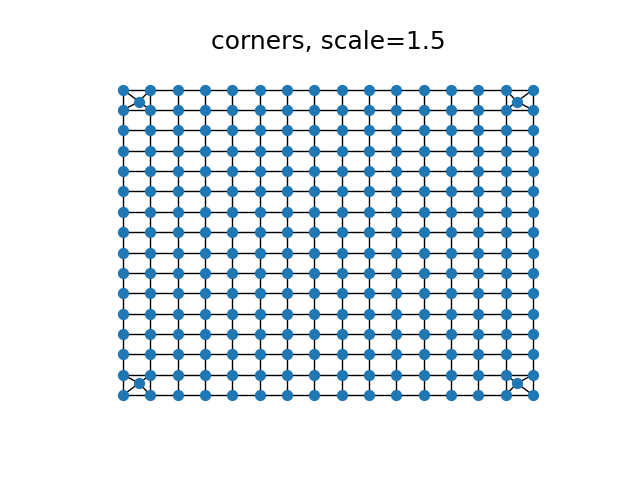

In [35]:
target_coord, edge_index, anchor_coords = get_geometric_graph('Grid2d', anchor_structure='corners', anchor_scale=1.5)
plot_edge_index(edge_index, coord=target_coord, title='corners, scale=1.5')

In [20]:
from PIL import ImageFont

ImageFont


font = ImageFont.truetype("arial.ttf", 12)
font

In [13]:
edge_index.shape

torch.Size([2, 915981])

In [33]:
x_coord.shape[0]

165

In [29]:
from torch_geometric import EdgeIndex
from utils.utils import gen_points


pos = gen_points('a')
pos = torch.tensor(pos, dtype=torch.float32) / pos.max()
edge_index = EdgeIndex(torch.ones(pos.size(0), pos.size(0)).tril(-1).nonzero().T.contiguous())
dist = torch.norm(pos[edge_index[0, :]] - pos[edge_index[1, :]], dim=-1)
edge_index = edge_index[:, dist < 0.25]
coord2scatter(pos, title='a', transparent=True, zero_center=False)
plot_edge_index(edge_index, coord=pos, title='a')

ImportError: cannot import name 'gen_points' from 'utils.utils' (d:\Onedrive\OneDrive - TU Eindhoven\Graduation Project\egnca\notebooks\..\utils\utils.py)

In [235]:
pos.min(axis=0), pos.max(axis=0)

(array([ 0., 12.], dtype=float32), array([14., 27.], dtype=float32))

(132, 2)

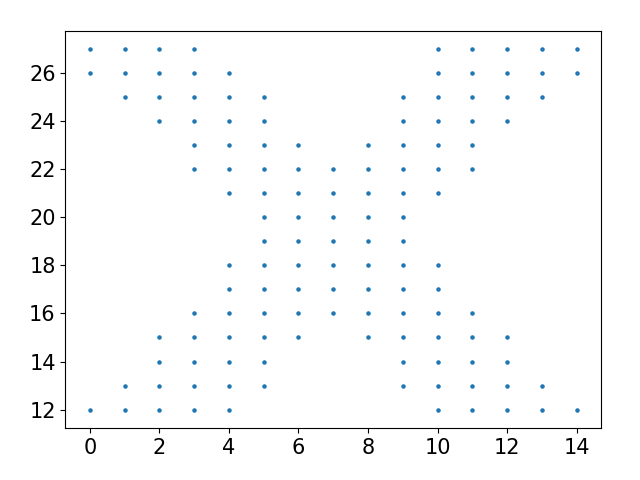

In [230]:
from PIL import ImageFont, ImageDraw, Image
import numpy as np

font = ImageFont.truetype('C:/Windows/Fonts/Arial.ttf', 30)
w, h = font.getsize('x')
im = Image.new('L', (w, h))
draw = ImageDraw.Draw(im)
draw.text((0, 0), 'x', fill=255, font=font)
im = np.uint8(im)
y, x = np.float32(im.nonzero())
pos = np.column_stack([x, y])
# pos -= (w/2, h/2)

coord2scatter(pos, zero_center=False)
pos.shape

[1.        0.5250001] [-1.        -0.5250001]
[1.        0.5250001]
tensor([0.0500, 0.0500, 0.0500, 0.0500, 0.0500, 0.0707, 0.0707, 0.0707, 0.0707,
        0.0707, 0.0707, 0.0707, 0.0707, 0.0707, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000, 0.1000, 0.1000, 0.1118, 0.1118, 0.1118, 0.1118, 0.1118, 0.1118,
        0.1118, 0.1118, 0.1118, 0.1118, 0.1118, 0.1118, 0.1118, 0.1118, 0.1118,
        0.1118, 0.1118, 0.1118, 0.1118, 0.1118, 0.1414, 0.1414, 0.1414, 0.1414,
        0.1414, 0.1414, 0.1414, 0.1414, 0.1414, 0.1414, 0.1414, 0.1500, 0.1500,
        0.1500])


(torch.Size([410, 2]), torch.Size([2, 3330]))

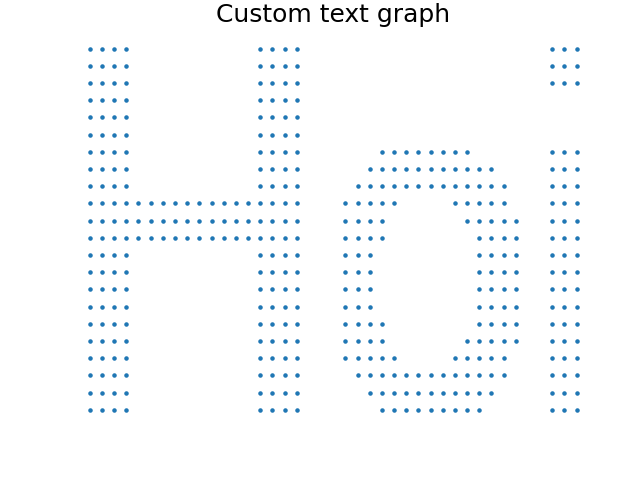

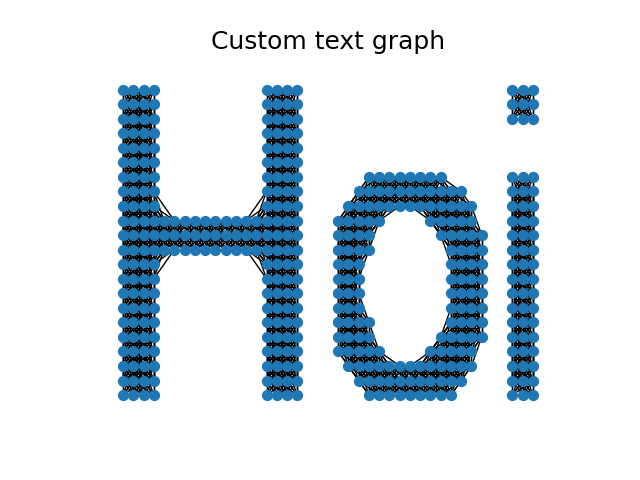

In [25]:
reload(data.datasets)
from data.datasets import text_to_graph

x_coord, x_edge_index, _ = text_to_graph('Hoi', distance=0.15)

coord2scatter(x_coord, title='Custom text graph', transparent=True, zero_center=False)#, show_anchors=True, anchors=model.anchors)
plot_edge_index(x_edge_index, coord=x_coord, title='Custom text graph')

torch.save((x_coord, x_edge_index), '../data/clouds/hoi.pt')
x_coord.shape, x_edge_index.shape

[0.93333334 1.        ] [-0.93333334 -1.        ]
[0.93333334 1.        ]
tensor([0.1333, 0.1333, 0.1333, 0.1333])
torch.Size([136, 2])


(tensor(0.), tensor(0.0661), tensor(0.1333))

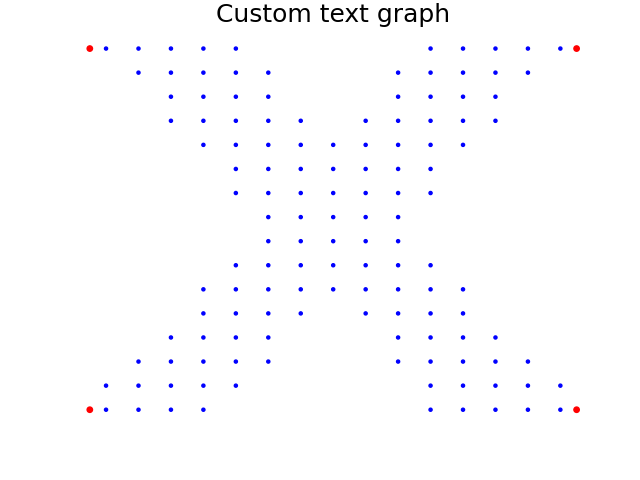

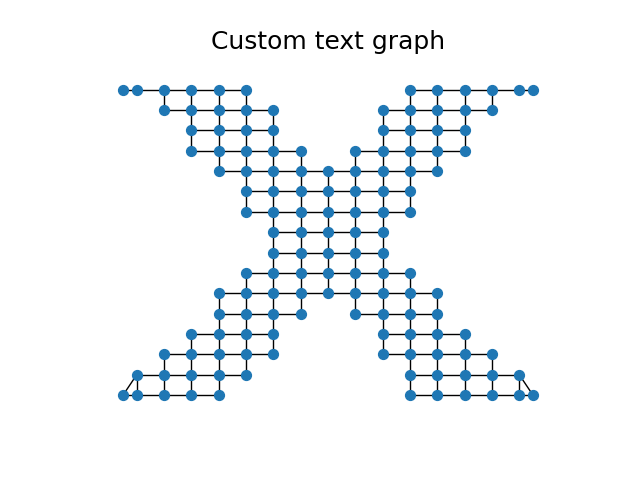

In [237]:
reload(utils.utils)
from torch_geometric import EdgeIndex
reload(data.datasets)
from data.datasets import text_to_graph



coord, edge_index, anchor_coords = text_to_graph('x', distance=0.15, anchor_structure='corners', anchor_dist=0.15, anchor_scale=1)

coord2scatter(coord, title='Custom text graph', transparent=True, zero_center=False, show_anchors=True, anchor_coords=anchor_coords)
plot_edge_index(edge_index, coord=coord, title='Custom text graph')
print(coord.shape)

distances = torch.abs(coord[edge_index[0]] - coord[edge_index[1]])
distances.min(), distances.mean(), distances.max()

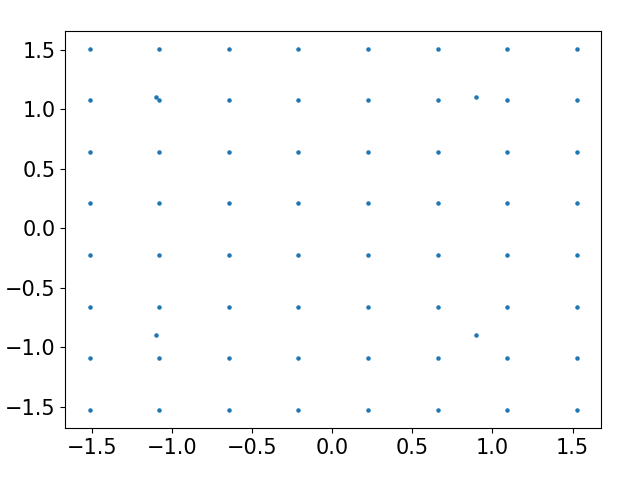

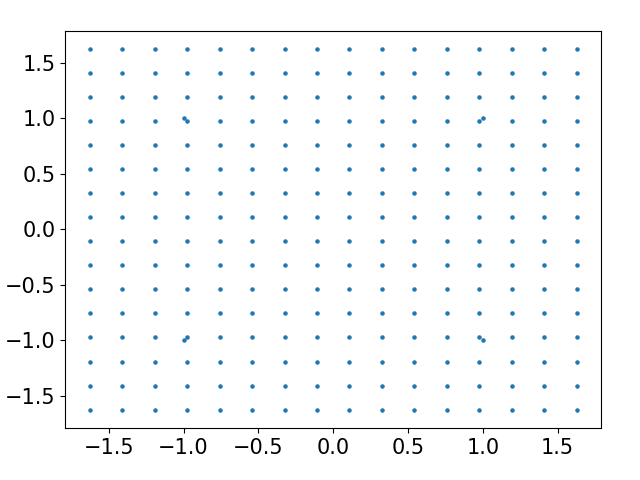

In [154]:
target_coord = model.target_coord.detach()[:-4]
target_coord = target_coord[1::2]
target_coord = target_coord[[i % 16 >= 8 for i, x in enumerate(target_coord)]]
target_coord = torch.cat([target_coord, model.target_coord.detach()[-4:]])
coord2scatter(target_coord)
coord2scatter(model.target_coord)

# transition rule dynamics animation

In [95]:
(coord_rot, _, _), rotation, rotated_anchor_coords = model.eval(n_steps=50, rotate=True, return_inter_states=False, dtype=torch.float64)
if model.beacon:
    coord2scatter(coord_rot, title="Rotated before", show_anchors=True, anchor_coords=rotated_anchor_coords)
else:
    coord2scatter(coord_rot, title="Rotated before", show_anchors=True, n_anchors=model.anchor_feat.size(0))
(coord, _, _) = model.eval(n_steps=50, rotate=False, return_inter_states=False, dtype=torch.float64)
if model.beacon:
    coord2scatter(coord, title="Not rotated", show_anchors=True, anchor_coords=model.encoder.anchor_coords)
else:
    coord2scatter(coord, title="Not rotated", show_anchors=True, n_anchors=model.anchor_feat.size(0))
rotated_coord = torch.matmul(rotation, coord.T).T
if model.beacon:
    rotated_anchors = torch.matmul(rotation, model.encoder.anchor_coords.T).T
    coord2scatter(rotated_coord, title="Rotated after", show_anchors=True, anchor_coords=rotated_anchors)
else:
    coord2scatter(rotated_coord, title="Rotated after", show_anchors=True, n_anchors=model.anchor_feat.size(0))
print(torch.abs(coord_rot - rotated_coord).mean())
print(rotation)

Using init coord


100%|██████████| 50/50 [00:00<00:00, 170.05it/s]


AttributeError: 'FixedTargetGAE' object has no attribute 'anchor_feat'

Using init coord


100%|██████████| 50/50 [00:00<00:00, 176.68it/s]


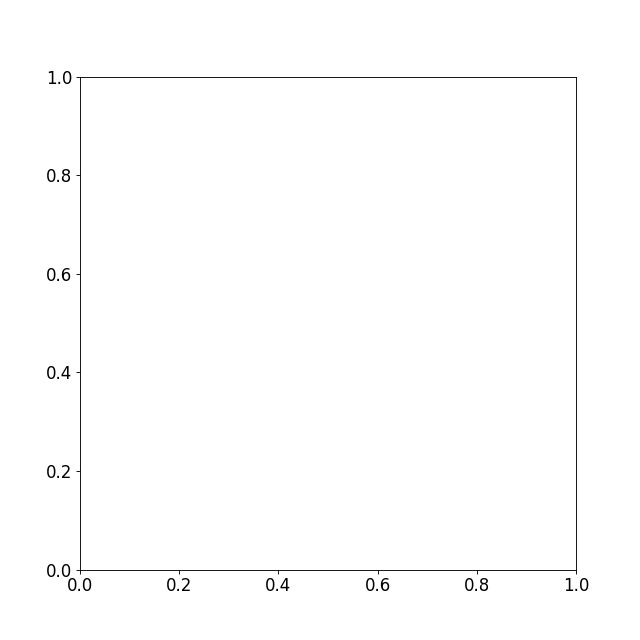

In [96]:
from utils.utils import compute_edge_index, ot_assignment
# init_coord = model.encoder.init_coord(model.pool.num_nodes, dtype=torch.float64)
# init_coord = model.encoder.init_coord(target_coord.shape[0], dtype=torch.float64)
init_coord = None
# init_coord = model.target_coord.clone()
# (inter_coords, inter_node_feats, inter_edge_index) = model.eval(n_steps=50, rotate=False, return_inter_states=True, dtype=torch.float64, init_coord=init_coord)
(inter_coords, inter_node_feats, inter_edge_index), _, _ = model.eval(n_steps=50, rotate=True
                                                                      , return_inter_states=True, dtype=torch.float64, init_coord=init_coord)

# edge_index = compute_edge_index(model.edge_index, model.init_coord, torch.tensor([model.init_coord.size(0)]).to(model.init_coord.device), model.relative_edges, model.dynamic_edges, distance=model.edge_distance, n_neighbours=model.edge_num)

def animate(t):
    ax.clear()
    # if model.structured_seed:
    #     coord2scatter(inter_coords[t], box_dim=box_dim*2, ax=ax, title=get_title(t, inter_coords[t], inter_edge_index[t]), zero_center=True, show_anchors=True, n_anchors=model.encoder.anchor_feat.size(0))#, feat=inter_node_feats[t])
    # else:
    #     coord2scatter(inter_coords[t], box_dim=box_dim*2, ax=ax, title=get_title(t, inter_coords[t], inter_edge_index[t]), zero_center=True)
    plot_edge_index(inter_edge_index[t], coord=inter_coords[t], box_dim=box_dim*2, ax=ax, title=get_title(t, inter_coords[t], inter_edge_index[t]))

fig = plt.figure(figsize=(8, 8), dpi=80)
fig.tight_layout()
ax = fig.add_subplot(projection='3d' if coord_dim == 3 else None)
ani = animation.FuncAnimation(fig, animate, frames=range(len(inter_coords)), interval=250, repeat=False)
# ani.save('grid-local-anchor-no-pers.gif', dpi=300, writer=animation.PillowWriter(fps=2))

In [270]:
inter_edge_index

tensor([[ 0.1354, -0.5937, -0.9490],
        [ 0.4813, -0.0328, -0.1969],
        [ 0.8465,  0.0882, -1.1199],
        [-0.0862,  0.3806, -0.9090]], dtype=torch.float64)

In [108]:
sliced_ot_loss(inter_coords[25], model.target_coord, 5, penalty=model.loss_fn == 'ot_p', edge_index=inter_edge_index[25], penalty_dist=model.penalty_distance)

(tensor(0.0152, dtype=torch.float64), tensor(0.0017, dtype=torch.float64))

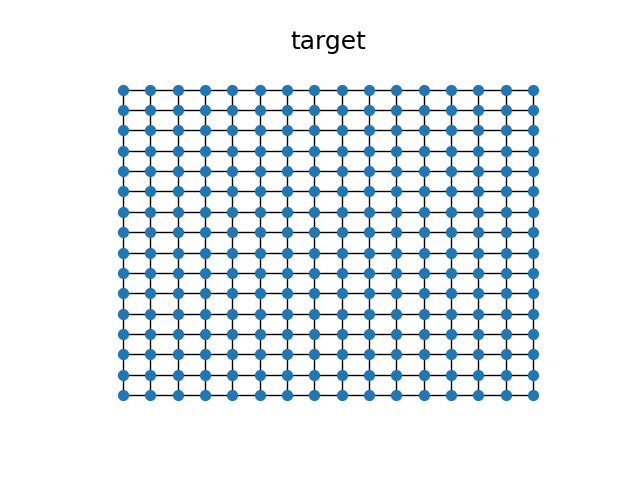

In [13]:
reload(utils)
reload(utils.utils)
from utils.utils import ot_assignment

edge_index = ot_assignment(model.target_coord, model.target_coord)
plot_edge_index(edge_index, coord=model.target_coord, title='target')

0.8166453561597392 0.20193668312636087
0.026635935109168757 0.04865571596085704


Text(0, 0.5, 'distance smoothness')

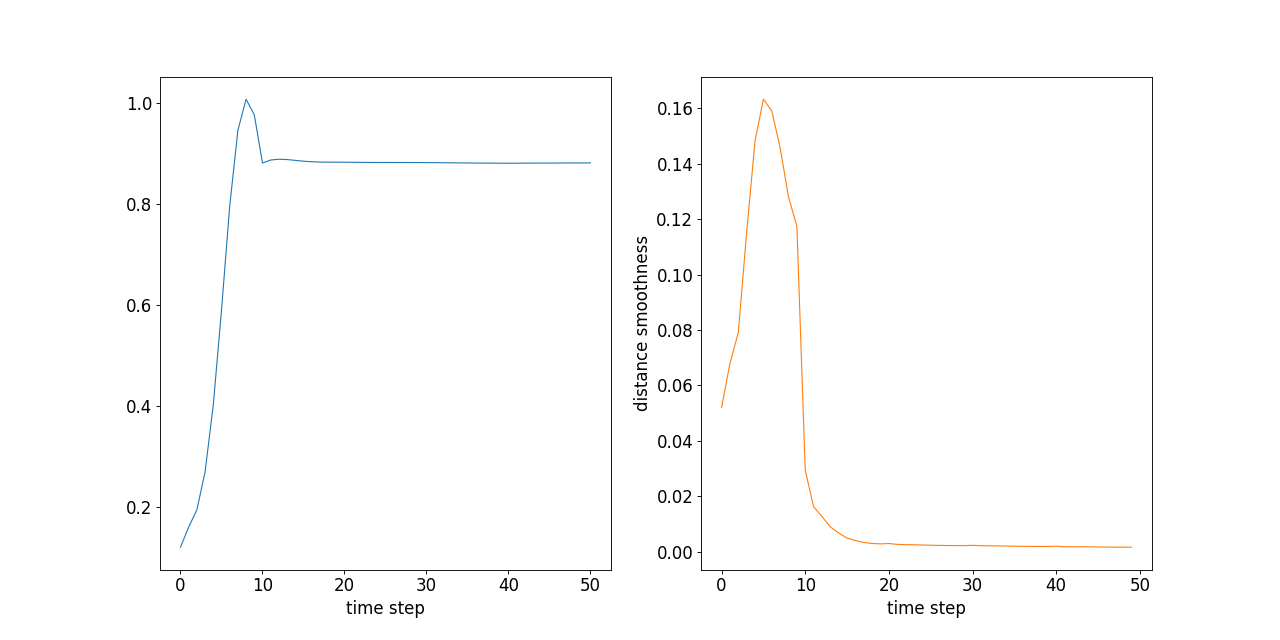

In [67]:
reload(utils.utils)
from utils.utils import smoothness, distance_smoothness


# smoothnesses, s_mean, s_std = smoothness(inter_coords, edge_index)
smoothnesses, s_mean, s_std = smoothness(inter_coords, inter_edge_index[0])
dist_smoothnesses, d_mean, d_std = distance_smoothness(inter_coords)

print(s_mean, s_std)
print(d_mean, d_std)

# Plot smoothness with line plot without showing all x ticks
fig_smoothness = plt.figure(figsize=(16, 8), dpi=80)
fig_smoothness.tight_layout()
ax_smoothness = fig_smoothness.add_subplot(121)
# plot_trend(range(len(smoothnesses)), smoothnesses, x_label='time step', y_label='smoothness', ax=ax)
# ax.set_xticks(range(0, len(smoothnesses), 10))
# Dont draw points, just the line
ax_smoothness.plot(range(len(smoothnesses)), smoothnesses, color='tab:blue', linewidth=1)
ax_smoothness.xaxis.set_label_text('time step')

# Plot distance smoothness with line plot without showing all x ticks
ax_dist_smoothness = fig_smoothness.add_subplot(122)
ax_dist_smoothness.plot(range(len(dist_smoothnesses)), dist_smoothnesses, color='tab:orange', linewidth=1)
ax_dist_smoothness.xaxis.set_label_text('time step')
ax_dist_smoothness.yaxis.set_label_text('distance smoothness')

In [253]:
ani.save('(116)x-ot-persistence-extra_penalty-angle-dynamic5-beacon_corners-beacon_angles.gif', dpi=300, writer=animation.PillowWriter(fps=2))

In [14]:
model.structured_seed

False

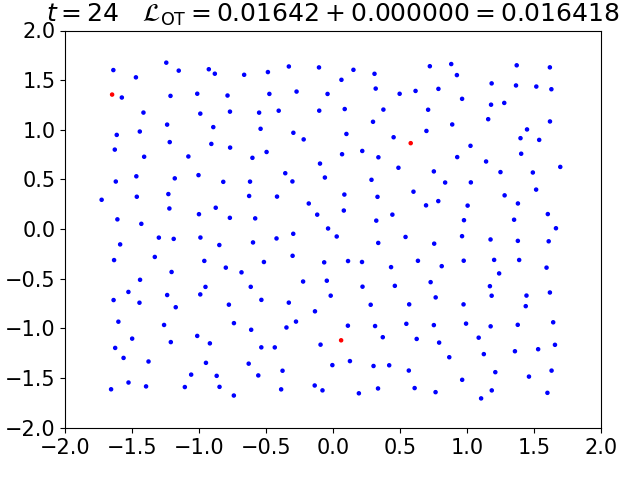

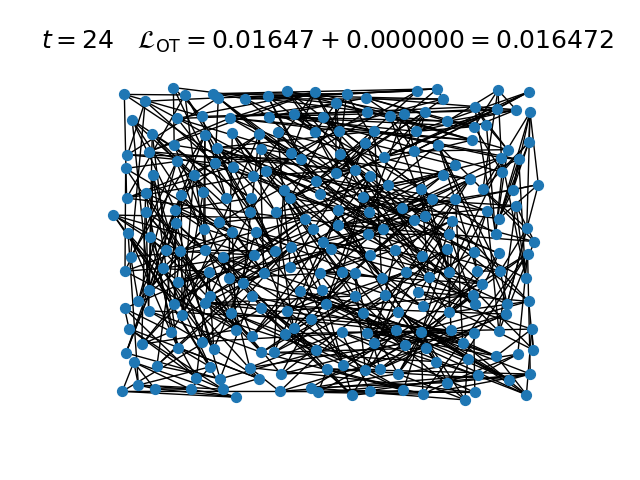

In [13]:
t = 24
filtered_edge_index = inter_edge_index[t][:, inter_edge_index[t][0] < model.target_coord.size(0) - model.encoder.anchor_feat.size(0)]
filtered_edge_index = filtered_edge_index[:, filtered_edge_index[1] < model.target_coord.size(0) - model.encoder.anchor_feat.size(0)]
coord2scatter(inter_coords[t], box_dim=box_dim*2, title=get_title(t, inter_coords[t]), zero_center=True, show_anchors=True, n_anchors=model.encoder.anchor_feat.size(0))
plot_edge_index(filtered_edge_index, coord=inter_coords[t], box_dim=box_dim*2, title=get_title(t, inter_coords[t]))

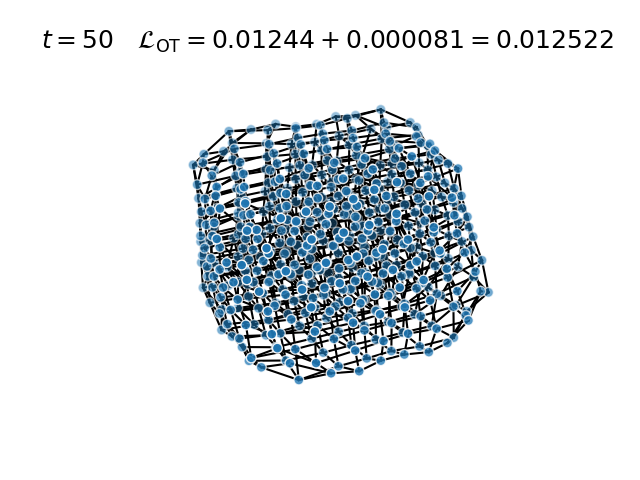

In [46]:
t = 50
coord2scatter(inter_coords[t], box_dim=box_dim, title=get_title(t, inter_coords[t], inter_edge_index[t]), zero_center=True)#, feat=inter_node_feats[t])
plot_edge_index(inter_edge_index[t], coord=inter_coords[t], box_dim=box_dim/2, title=get_title(t, inter_coords[t], inter_edge_index[t]))

100%|██████████| 1000/1000 [00:28<00:00, 35.23it/s]


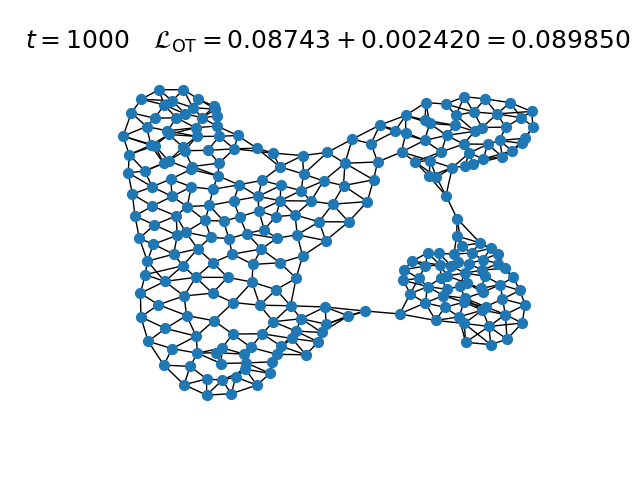

In [68]:
n_steps = 1000
final_coord, final_node_feat, final_edge_index = model.eval(n_steps=n_steps, rotate=False, dtype=torch.float64, init_coord=init_coord)
fig = coord2scatter(final_coord, title=get_title(n_steps, final_coord), box_dim=box_dim*2, zero_center=True)
plot_edge_index(final_edge_index, coord=final_coord.detach().cpu().numpy(), title=get_title(n_steps, final_coord, final_edge_index))

In [110]:
from tqdm.notebook import tqdm

coord = final_coord

def cost(p):
    return sum(local_loss(coord[p], model.target_coord, model.edge_index))

# Use simulated annealing to find permutation of coord that minimizes cost
#initialize random permutation
# best_perm = torch.randperm(coord.size(0)).tolist()
best_perm = sorted_indices
best_cost = cost(best_perm)
print('Initial cost:', best_cost)
curr, curr_cost = best_perm, best_cost
for i in tqdm(range(1000)):
    candidate = curr.copy()
    a, b = torch.randint(0, len(candidate), (2,))
    candidate[a], candidate[b] = candidate[b], candidate[a]
    candidate_cost = cost(candidate)
    if candidate_cost < curr_cost:
        curr, curr_cost = candidate, candidate_cost
        if curr_cost < best_cost:
            best_perm, best_cost = curr, curr_cost
            print('New best cost:', best_cost)
    else:
        if torch.rand(1) < torch.exp((curr_cost - candidate_cost) / 0.1):
            curr, curr_cost = candidate, candidate_cost

Initial cost: tensor([1.2376], dtype=torch.float64)


  0%|          | 0/1000 [00:00<?, ?it/s]

In [111]:
best_perm = sorted_indices
best_cost = cost(best_perm)
for i in tqdm(range(1000)):
    candidate = torch.randperm(coord.size(0)).tolist()
    candidate_cost = cost(candidate)
    if candidate_cost < best_cost:
        best_perm, best_cost = candidate, candidate_cost
        print('New best cost:', best_cost)

  0%|          | 0/1000 [00:00<?, ?it/s]

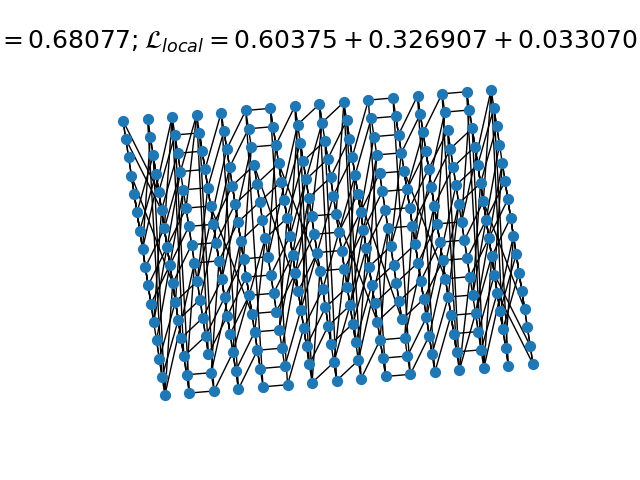

In [171]:
coord = model.target_coord.clone()
rotation = torch.nn.init.orthogonal_(
    torch.empty(model.encoder.coord_dim, model.encoder.coord_dim)
).to(device=model.device, dtype=torch.float64)
coord = torch.matmul(rotation, coord.T).T
indices = list(range(coord.size(0)))
pairs = list(zip(indices, coord))
sorted_pairs = sorted(pairs, key=lambda x: (x[1][1] * 1).round(decimals=1))
sorted_pairs = sorted(sorted_pairs, key=lambda x: (x[1][0] * 1).round(decimals=1))
sorted_indices = [x[0] for x in sorted_pairs]
plot_edge_index(model.edge_index, coord=coord[sorted_indices], title=get_title(0, coord[sorted_indices]))

# regeneration

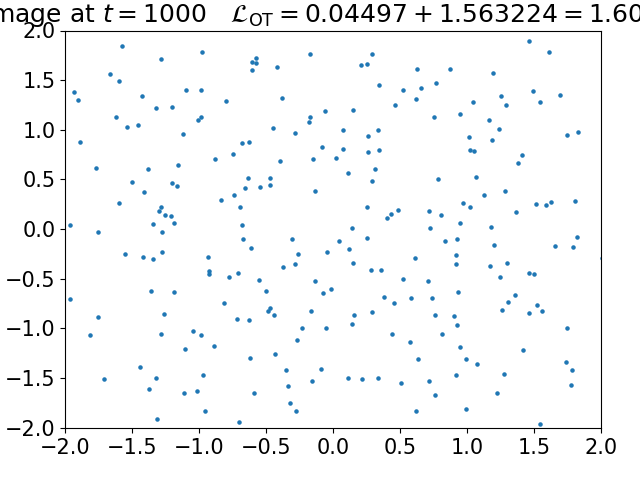

In [71]:
# damaged_coord = damage_coord(final_coord, std=0.25, radius=1.0)
# damaged_coord = damage_coord(final_coord, std=0.25)
# damaged_coord = damage_coord(inter_coords[-1], std=0.25, radius=1.0)#, n_anchors=model.encoder.anchor_feat.size(0))
damaged_coord = damage_coord(inter_coords[-1], std=0.25)#, n_anchors=model.encoder.anchor_feat.size(0))
coord2scatter(damaged_coord, box_dim=box_dim*2, title='damage at ' + get_title(n_steps, damaged_coord))

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:01<00:00, 27.48it/s]


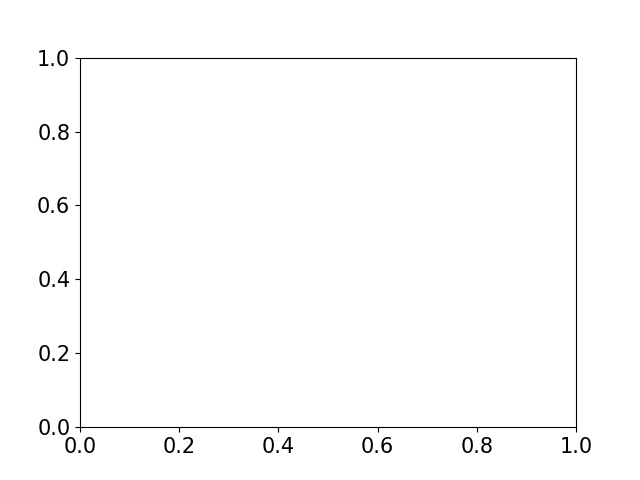

In [73]:
(regenerated_coords, _, regenerated_edge_indices) = model.eval(
    n_steps=50, init_coord=damaged_coord, init_node_feat=final_node_feat, return_inter_states=True)

def animate(t):
    ax.clear()
    # coord2scatter(regenerated_coords[t].detach(), box_dim=box_dim*2, ax=ax, title=get_title(t, regenerated_coords[t]))
    plot_edge_index(regenerated_edge_indices[t], coord=regenerated_coords[t].detach().cpu().numpy(), box_dim=box_dim*2, ax=ax, title=get_title(t, regenerated_coords[t], regenerated_edge_indices[t]))

fig = plt.figure()
fig.tight_layout()
ax = fig.add_subplot(projection='3d' if coord_dim == 3 else None)
ani = animation.FuncAnimation(fig, animate, frames=range(len(regenerated_coords)), interval=250, repeat=False)
# ani.save('regenerate.gif', dpi=300, writer=animation.PillowWriter(fps=2))

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:18<00:00, 55.29it/s]


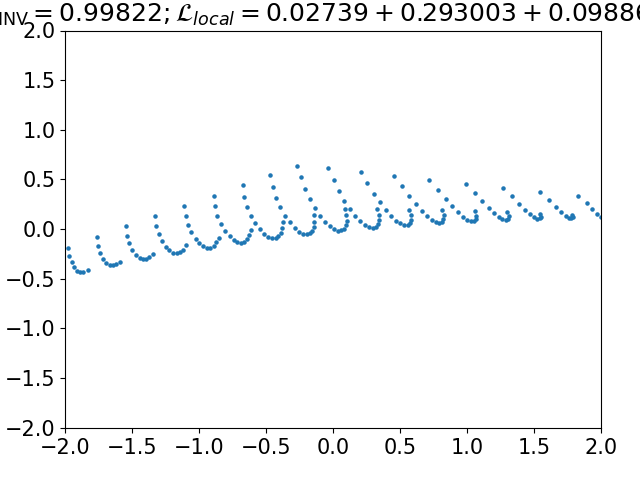

In [85]:
n_regeneration_steps = 1000
regenerated_coord, _ = model.eval(n_steps=n_regeneration_steps, init_coord=damaged_coord, init_node_feat=final_node_feat)[0]
coord2scatter(regenerated_coord, box_dim=box_dim * 2, title=get_title(n_regeneration_steps, regenerated_coord))

In [4]:
from typing import Optional
from torch_geometric import EdgeIndex
from utils.utils import triplets


def calculate_angles(
    coord: torch.Tensor,
    edge_index: EdgeIndex,
    num_nodes: int,
    return_indices: Optional[bool] = False
):
    # TODO ignore anchors
    idx_i, idx_j, idx_k = triplets(
        edge_index, num_nodes=num_nodes)

    coord_ik, coord_ij = coord.index_select(0, idx_k) - coord.index_select(0, idx_i), coord.index_select(0, idx_j) - coord.index_select(0, idx_i)

    print(coord_ik[:5], coord_ij[:5])

    # Use arctan to calculate the angle, making sure that it works for any dimension
    # angle1 = 2 * torch.atan2(
    #     torch.norm(coord_ik * coord_ij, dim=1),
    #     torch.norm(coord_ik, dim=1) * torch.norm(coord_ij, dim=1)
    # )
    # dot_product = (coord_ij * coord_ik).sum(dim=-1)
    # norm_product = (coord_ij.norm(dim=-1) * coord_ik.norm(dim=-1)).clamp(min=1e-5)
    # eps = torch.tensor(1e-7, device=coord.device)
    # angle = torch.arccos((dot_product / (norm_product)).clamp(-1 + eps, 1 - eps))# / torch.pi

    angle = angle_btw(coord_ik, coord_ij)
    
    if return_indices:
        return angle, (idx_i, idx_j, idx_k)

    return angle

In [3]:
def ang(c1, c2):
    dot_product = (c1 * c2).sum(dim=-1)
    norm_product = (c1.norm(dim=-1) * c2.norm(dim=-1)).clamp(min=1e-5)
    eps = torch.tensor(1e-7, device=c1.device)
    angle = torch.arccos((dot_product / (norm_product)).clamp(-1 + eps, 1 - eps)) / torch.pi

    angle1 = 2 * torch.atan2(
        torch.norm(c1 * c2, dim=1),
        torch.norm(c1, dim=1) * torch.norm(c2, dim=1)
    ) / torch.pi
    
    # get a tensor of the x and y coordinates of the vectors
    xs = torch.stack([c1[:, 0], c2[:, 0]], dim=1)
    ys = torch.stack([c1[:, 1], c2[:, 1]], dim=1)
    print(xs)
    angle2 = torch.atan2(ys[0], xs[0]) / torch.pi
    return angle, angle1, angle2

In [4]:
import torch
from torch import arctan, pi, signbit
from torch.linalg import norm

def angle_btw(v1, v2):
    u1 = v1 / norm(v1, dim=1, keepdim=True)
    u2 = v2 / norm(v2, dim=1, keepdim=True)

    y = u1 - u2
    x = u1 + u2

    a0 = 2 * arctan(norm(y, dim=1) / norm(x, dim=1))

    mask1 = (~signbit(a0)) | signbit(pi - a0)
    mask2 = signbit(a0)
    mask3 = ~(mask1 | mask2)

    angle = torch.zeros_like(a0)
    angle[mask1] = a0[mask1]
    angle[mask2] = torch.tensor(0.0)
    angle[mask3] = pi

    return angle / pi


In [5]:
def agle(a, b):
    # print(a, b)
    dot = (a * b).sum(-1)
    det = torch.det(torch.stack([a, b], dim=1))
    # print(dot)
    angle = torch.atan2(det, dot)
    return angle / torch.pi

In [6]:
a = torch.Tensor([[1, 0], [1, 0]])
b = torch.Tensor([[1, 1], [1, -1]])
print(ang(a, b))
print(angle_btw(a, b))
print(agle(a, b))

tensor([[1., 1.],
        [1., 1.]])
(tensor([0.2500, 0.2500]), tensor([0.3918, 0.3918]), tensor([0.0000, 0.2500]))
tensor([0.2500, 0.2500])
tensor([ 0.2500, -0.2500])


In [13]:
def local_loss2(
    coord_1: torch.Tensor,
    coord_2: torch.Tensor,
    edge_index: EdgeIndex,
):
    if coord_1.shape != coord_2.shape:
        if coord_1.shape[0] % coord_2.shape[0] == 0:
            coord_2 = coord_2.repeat(coord_1.shape[0] // coord_2.shape[0], 1)
        else:
            raise ValueError("The number of nodes in the two graphs must be equal or one must be a multiple of the other")

    # Compute the distances between the nodes and their neighbors
    dist_1 = torch.norm(coord_1[edge_index[0]] - coord_1[edge_index[1]], dim=-1)
    dist_2 = torch.norm(coord_2[edge_index[0]] - coord_2[edge_index[1]], dim=-1)
    
    # Compute the angles between each triplet of nodes
    angle_1 = calculate_angles(coord_1, edge_index, coord_1.size(0))
    angle_2 = calculate_angles(coord_2, edge_index, coord_2.size(0))

    print(angle_1 - angle_2)
    
    # Compute the loss
    dist_loss = ((dist_1 - dist_2) ** 2).mean() ** 0.5
    angle_loss = ((angle_1 - angle_2) ** 2).mean() ** 0.5
    return dist_loss, angle_loss

tensor([[ 0., -1.],
        [ 1.,  0.],
        [ 1.,  0.],
        [ 0., -1.],
        [-1.,  0.]]) tensor([[ 1.,  0.],
        [ 0., -1.],
        [-1.,  0.],
        [-1.,  0.],
        [ 1.,  0.]])
tensor([[ 0., -1.],
        [-1.,  0.],
        [ 1.,  0.],
        [ 0., -1.],
        [ 1.,  0.]]) tensor([[-1.,  0.],
        [ 0., -1.],
        [ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.]])
tensor([0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 1., 0., 0.])
tensor([[ 0., -1.],
        [ 1.,  0.],
        [ 1.,  0.],
        [ 0., -1.],
        [-1.,  0.]]) tensor([[ 1.,  0.],
        [ 0., -1.],
        [-1.,  0.],
        [-1.,  0.],
        [ 1.,  0.]])
tensor([[ 0., -1.],
        [-1.,  0.],
        [ 1.,  0.],
        [ 0., -1.],
        [ 1.,  0.]]) tensor([[-1.,  0.],
        [ 0., -1.],
        [ 1.,  0.],
        [ 1.,  0.],
        [ 1.

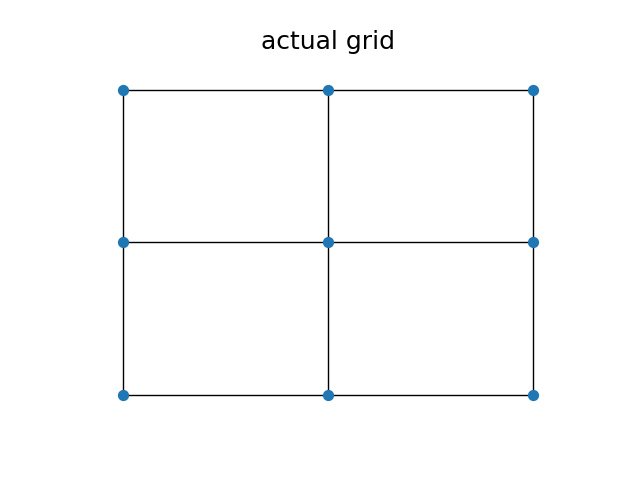

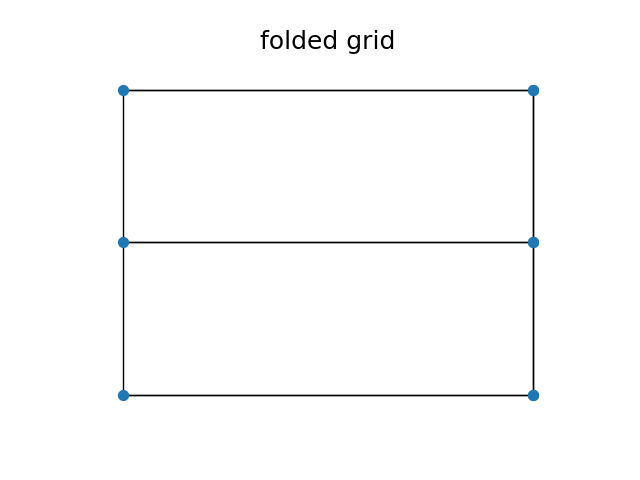

In [14]:
from utils.utils import local_loss

coord1 = torch.Tensor([[-1, 1], [0, 1], [1, 1], [-1, 0], [0, 0], [1, 0], [-1, -1], [0, -1], [1, -1]])
coord2 = torch.Tensor([[1, 1], [0, 1], [1, 1], [1, 0], [0, 0], [1, 0], [1, -1], [0, -1], [1, -1]])
edge_index = torch.Tensor([[0, 1], [0, 3], [1, 0], [1, 2], [1, 4], [2, 1], [2, 5], [3, 0], [3, 4], [3, 6], [4, 1], [4, 3], [4, 5], [4, 7], [5, 2], [5, 4], [5, 8], [6, 3], [6, 7], [7, 4], [7, 6], [7, 8], [8, 5], [8, 7]]).T.long()
plot_edge_index(edge_index, coord=coord1, title='actual grid')
plot_edge_index(edge_index, coord=coord2, title='folded grid')

dl, al = local_loss2(coord1, coord2, edge_index)
angle_1 = calculate_angles(coord1, edge_index, coord1.size(0))
angle_2 = calculate_angles(coord2, edge_index, coord2.size(0))
print('-------')
print(angle_1)
print(angle_2)
print(dl, al)
print(angle_1 == angle_2)
print(angle_1[angle_1 != angle_2])
print(angle_2[angle_1 != angle_2])

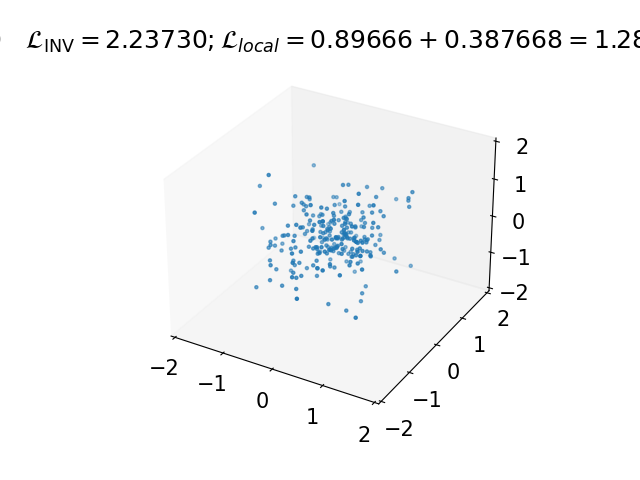

In [73]:
pool_coords = model.pool.pool_coord
t = 0
coord2scatter(pool_coords[t].detach(), box_dim=box_dim*2, title=get_title(t, pool_coords[t]))

In [37]:
from utils.utils import calculate_angles

coord = torch.Tensor([[0, 0], [1, 0], [0, 1], [1, 1]])
edge_index = torch.Tensor([[0, 1], [1, 0], [0, 2], [1, 2], [0, 3], [1, 3]]).T.long()
angle, indices = calculate_angles(coord, edge_index, coord.size(0), return_indices=True)

In [38]:
angle, indices

(tensor([0.5000, 0.2500, 0.2500, 0.5000, 0.5000, 0.2500, 0.2500, 0.2500, 0.2500,
         0.2500, 0.5000, 0.2500]),
 (tensor([0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1]),
  tensor([1, 1, 0, 0, 2, 2, 2, 2, 3, 3, 3, 3]),
  tensor([2, 3, 2, 3, 1, 3, 0, 3, 1, 2, 0, 2])))

In [80]:
from utils.utils import calculate_angles

def aggregated_sum_2_indices_test(
    data: torch.Tensor,
    index_i: torch.LongTensor,
    index_j: torch.LongTensor,
    num_segments: int,
    mean: bool = False
):
    index = torch.cat([idx_i.unsqueeze(1), idx_j.unsqueeze(1)], dim=1).unique(dim=0, return_inverse=True)[1]
    index = index.unsqueeze(1).repeat(1, data.size(1))
    agg = data.new_full((num_segments, data.size(1)), 0).scatter_add_(0, index, data)
    if mean:
        counts = data.new_full((num_segments, data.size(1)), 0).scatter_add_(0, index, torch.ones_like(data))
        agg = agg / counts.clamp(min=1)
    return agg

# coord = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float)
# edge_index = torch.LongTensor([[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3], [1, 2, 3, 0, 2, 3, 0, 1, 3, 0, 1, 2]])
coord = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float)
edge_index = torch.LongTensor([[0, 0, 0, 1, 1, 2, 2], [1, 2, 3, 0, 2, 0, 1]])
angles, (idx_i, idx_j, idx_k) = calculate_angles(coord, edge_index, coord.size(0), return_indices=True)

print(angles)
print(idx_i)
print(idx_j)
print(idx_k)

# In this case we need the output of the aggregation to be the same as the input, because no edge is in multiple triplets
aggregated_sum_2_indices_test(angles.unsqueeze(1), idx_i, idx_j, edge_index.size(1))

tensor([0.5000, 0.2500, 0.5000, 0.2500, 0.2500, 0.2500, 0.2500, 0.2500, 0.2500,
        0.2500])
tensor([0, 0, 0, 0, 0, 0, 1, 1, 2, 2])
tensor([1, 1, 2, 2, 3, 3, 0, 2, 0, 1])
tensor([2, 3, 1, 3, 1, 2, 2, 0, 1, 0])
tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [1],
        [2],
        [2]])


tensor([[0.7500],
        [0.7500],
        [0.5000],
        [0.2500],
        [0.2500],
        [0.2500],
        [0.2500]])

In [79]:
print(torch.cat([idx_i.unsqueeze(1), idx_j.unsqueeze(1)], dim=1))
torch.cat([idx_i.unsqueeze(1), idx_j.unsqueeze(1)], dim=1).unique(dim=0, return_inverse=True)

tensor([[0, 1],
        [0, 1],
        [0, 2],
        [0, 2],
        [0, 3],
        [0, 3],
        [1, 0],
        [1, 2],
        [2, 0],
        [2, 1]])


(tensor([[0, 1],
         [0, 2],
         [0, 3],
         [1, 0],
         [1, 2],
         [2, 0],
         [2, 1]]),
 tensor([0, 0, 1, 1, 2, 2, 3, 4, 5, 6]))

In [70]:
idx_j.unsqueeze(1)

tensor([[1],
        [1],
        [2],
        [2],
        [3],
        [3],
        [0],
        [2],
        [0],
        [1]])

In [67]:
from egnn import aggregated_sum

aggregated_sum(idx_j.unsqueeze(1), idx_i, edge_index.size(0))

RuntimeError: index 2 is out of bounds for dimension 0 with size 2

In [105]:
coords = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float)
beacon_coords = torch.tensor([[0.5, 0], [0, 0.5], [0.5, 0.5]])
edge_index = torch.LongTensor([[0, 0, 1, 1, 2, 2, 3, 3], [1, 2, 0, 3, 0, 3, 1, 2]])

coord_diff = coords[edge_index[0]] - coords[edge_index[1]]
print(coord_diff.shape)
coord_radial = torch.sum(coord_diff ** 2, 1, keepdim=True)
print(coord_radial.shape)

repeated_beacon_coords = beacon_coords.unsqueeze(0).repeat(edge_index.size(1), 1, 1)
repeated_coords = coords[edge_index[0]].unsqueeze(1).repeat(1, beacon_coords.size(0), 1)
beacon_diff = repeated_coords - repeated_beacon_coords
print(beacon_diff.shape)
beacon_radial = torch.sum(beacon_diff ** 2, 2)
coord_radial = torch.cat([coord_radial, beacon_radial], dim=1)

print(coord_radial.shape)
coord_radial

torch.Size([8, 2])
torch.Size([8, 1])
torch.Size([8, 3, 2])
torch.Size([8, 4])


tensor([[1.0000, 0.2500, 0.2500, 0.5000],
        [1.0000, 0.2500, 0.2500, 0.5000],
        [1.0000, 1.2500, 0.2500, 0.5000],
        [1.0000, 1.2500, 0.2500, 0.5000],
        [1.0000, 0.2500, 1.2500, 0.5000],
        [1.0000, 0.2500, 1.2500, 0.5000],
        [1.0000, 1.2500, 1.2500, 0.5000],
        [1.0000, 1.2500, 1.2500, 0.5000]])

In [338]:
reload(utils.utils)
from utils.utils import calculate_angles


coords = torch.tensor([[0, 0, 0], [0, 1, 0], [1, 0, 0], [1, 1, 1]], dtype=torch.float)
beacon_coords = torch.tensor([[0.5, 0, 0], [0, 0.5, 0], [0.5, 0.5, 0.5]])
edge_index = torch.LongTensor([[0, 0, 1, 1, 2, 2, 3, 3], [1, 2, 0, 3, 0, 3, 1, 2]])

coord_diff = coords[edge_index[0]] - coords[edge_index[1]]
coord_diff = coord_diff.unsqueeze(1).repeat(1, beacon_coords.size(0), 1)

repeated_beacon_coords = beacon_coords.unsqueeze(0).repeat(edge_index.size(1), 1, 1)
repeated_coords = coords[edge_index[0]].unsqueeze(1).repeat(1, beacon_coords.size(0), 1)
beacon_diff = repeated_coords - repeated_beacon_coords

# coord_diff = coord_diff.reshape(-1, coords.size(-1))
# beacon_diff = beacon_diff.reshape(-1, coords.size(-1))

print(coord_diff.shape, beacon_diff.shape)

angles = calculate_angles(None, None, None, coord_ik=beacon_diff, coord_ij=coord_diff)
print(angles.shape)

for e, edge in enumerate(angles):
    for bc, angle in enumerate(edge):
        print(f'Angle between edge {coords[edge_index[0, e]].detach().numpy()} - {coords[edge_index[1, e]].detach().numpy()} and beacon {beacon_coords[bc].detach().numpy()}: {angle:.3f}')

torch.Size([8, 3, 3]) torch.Size([8, 3, 3])
torch.Size([8, 3])
Angle between edge [0. 0. 0.] - [0. 1. 0.] and beacon [0.5 0.  0. ]: 0.500
Angle between edge [0. 0. 0.] - [0. 1. 0.] and beacon [0.  0.5 0. ]: 0.000
Angle between edge [0. 0. 0.] - [0. 1. 0.] and beacon [0.5 0.5 0.5]: 0.304
Angle between edge [0. 0. 0.] - [1. 0. 0.] and beacon [0.5 0.  0. ]: 0.000
Angle between edge [0. 0. 0.] - [1. 0. 0.] and beacon [0.  0.5 0. ]: 0.500
Angle between edge [0. 0. 0.] - [1. 0. 0.] and beacon [0.5 0.5 0.5]: 0.304
Angle between edge [0. 1. 0.] - [0. 0. 0.] and beacon [0.5 0.  0. ]: 0.148
Angle between edge [0. 1. 0.] - [0. 0. 0.] and beacon [0.  0.5 0. ]: 0.000
Angle between edge [0. 1. 0.] - [0. 0. 0.] and beacon [0.5 0.5 0.5]: 0.304
Angle between edge [0. 1. 0.] - [1. 1. 1.] and beacon [0.5 0.  0. ]: 0.398
Angle between edge [0. 1. 0.] - [1. 1. 1.] and beacon [0.  0.5 0. ]: 0.500
Angle between edge [0. 1. 0.] - [1. 1. 1.] and beacon [0.5 0.5 0.5]: 0.196
Angle between edge [1. 0. 0.] - [0. 0

In [32]:
torch.cat([coords, torch.Tensor([])], dim=1)

tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])

In [37]:
2 * torch.pi * a @ coeff

tensor([[ 0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000],
        [ 6.2832,  6.2832,  6.2832,  6.2832],
        [ 6.2832,  6.2832,  6.2832,  6.2832],
        [ 6.2832,  6.2832,  6.2832,  6.2832],
        [12.5664, 12.5664, 12.5664, 12.5664],
        [12.5664, 12.5664, 12.5664, 12.5664],
        [12.5664, 12.5664, 12.5664, 12.5664],
        [18.8496, 18.8496, 18.8496, 18.8496],
        [18.8496, 18.8496, 18.8496, 18.8496],
        [18.8496, 18.8496, 18.8496, 18.8496],
        [25.1327, 25.1327, 25.1327, 25.1327],
        [25.1327, 25.1327, 25.1327, 25.1327],
        [25.1327, 25.1327, 25.1327, 25.1327]])

In [43]:
a = torch.tensor([[0, 0, 0], [1, 0, 1], [2, 2, 2], [3, 3, 3], [4, 4, 4]])
print(a.shape)
# fill a with the numbers 1 to 15
a = a.reshape(-1, 1)
# a = a.view(5, 3)
print(a.shape)
# a = a.T.unsqueeze(2)
print(a)

coeff = torch.normal(1, 0, (1, 8 // 2))
print(coeff)

feat = torch.pi * a @ coeff
feat = torch.cat([feat.cos(), feat.sin()], dim=-1)
print(feat)
print(feat.shape)
feat = feat.reshape(5, -1)
print(feat.shape)
feat[1]

torch.Size([5, 3])
torch.Size([15, 1])
tensor([[0],
        [0],
        [0],
        [1],
        [0],
        [1],
        [2],
        [2],
        [2],
        [3],
        [3],
        [3],
        [4],
        [4],
        [4]])
tensor([[1., 1., 1., 1.]])
tensor([[ 1.0000e+00,  1.0000e+00,  1.0000e+00,  1.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 1.0000e+00,  1.0000e+00,  1.0000e+00,  1.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 1.0000e+00,  1.0000e+00,  1.0000e+00,  1.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00],
        [-1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -8.7423e-08,
         -8.7423e-08, -8.7423e-08, -8.7423e-08],
        [ 1.0000e+00,  1.0000e+00,  1.0000e+00,  1.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00],
        [-1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -8.7423e-08,
         -8.7423e-08, -8.7423e-08, -8.7423e-08],


tensor([-1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -8.7423e-08,
        -8.7423e-08, -8.7423e-08, -8.7423e-08,  1.0000e+00,  1.0000e+00,
         1.0000e+00,  1.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00,
        -8.7423e-08, -8.7423e-08, -8.7423e-08, -8.7423e-08])

In [46]:
from torch_geometric import EdgeIndex

def triplets1(
    edge_index: EdgeIndex,
    num_nodes,
):
    row, col = edge_index  # i->j

    # Create a dense adjacency matrix
    adj_matrix = torch.zeros((num_nodes, num_nodes), dtype=torch.bool, device=edge_index.device)
    adj_matrix[row, col] = 1

    # Get the row-wise neighbors for each edge
    adj_row = adj_matrix.index_select(0, row)

    # Calculate the number of triplets for each edge
    num_triplets = adj_row.sum(dim=1, dtype=torch.long)

    # Node indices (k->i->j) for triplets.
    idx_i = row.repeat_interleave(num_triplets)
    idx_j = col.repeat_interleave(num_triplets)
    idx_k = adj_row.nonzero(as_tuple=True)[1]
    mask = idx_j != idx_k  # Remove j == k triplets.
    idx_i, idx_j, idx_k = idx_i[mask], idx_j[mask], idx_k[mask]
    # idx_i, idx_j, idx_k = idx_i.index_select(0, mask.nonzero(as_tuple=True)[0]), \
    #                       idx_j.index_select(0, mask.nonzero(as_tuple=True)[0]), \
    #                       idx_k.index_select(0, mask.nonzero(as_tuple=True)[0])

    return idx_i, idx_j, idx_k

def triplets2(
    edge_index: EdgeIndex,
    num_nodes,
):
    row, col = edge_index  # i->j

    # Create a dense adjacency matrix
    adj_matrix = torch.zeros((num_nodes, num_nodes), dtype=torch.bool, device=edge_index.device)
    adj_matrix[row, col] = 1

    # Get the row-wise neighbors for each edge
    adj_row = adj_matrix.index_select(0, row)

    # Calculate the number of triplets for each edge
    num_triplets = adj_row.sum(dim=1, dtype=torch.long)

    # Node indices (k->i->j) for triplets.
    idx_i = row.repeat_interleave(num_triplets)
    idx_j = col.repeat_interleave(num_triplets)
    idx_k = adj_row.nonzero(as_tuple=True)[1]
    mask = idx_j != idx_k  # Remove j == k triplets.
    # idx_i, idx_j, idx_k = idx_i[mask], idx_j[mask], idx_k[mask]
    idx_i, idx_j, idx_k = idx_i.index_select(0, mask.nonzero(as_tuple=True)[0]), \
                          idx_j.index_select(0, mask.nonzero(as_tuple=True)[0]), \
                          idx_k.index_select(0, mask.nonzero(as_tuple=True)[0])

    return idx_i, idx_j, idx_k

In [57]:
from tqdm.auto import tqdm
from time import time

ei = model.edge_index.clone().to('cuda')
n = model.init_coord.size(0)

its = 10000

__ = triplets1(ei, n)

t1 = time()
for _ in tqdm(range(its)):
    __ = triplets1(ei, n)
print(f"Time for variant 1: {time() - t1:.4f}")

__ = triplets2(ei, n)

t2 = time()
for _ in tqdm(range(its)):
    __ = triplets2(ei, n)
print(f"Time for variant 2: {time() - t2:.4f}")

__ = triplets1(ei, n)

t1 = time()
for _ in tqdm(range(its)):
    __ = triplets1(ei, n)
print(f"Time for variant 1: {time() - t1:.4f}")

t2 = time()
for _ in tqdm(range(its)):
    __ = triplets2(ei, n)
print(f"Time for variant 2: {time() - t2:.4f}")


Time for variant 1: 15.4064


Time for variant 2: 15.6689


Time for variant 1: 15.9039


Time for variant 2: 15.9959


: 

tensor([1., 0.])
tensor([-0.5000,  0.8660])
tensor([-0.5000, -0.8660])


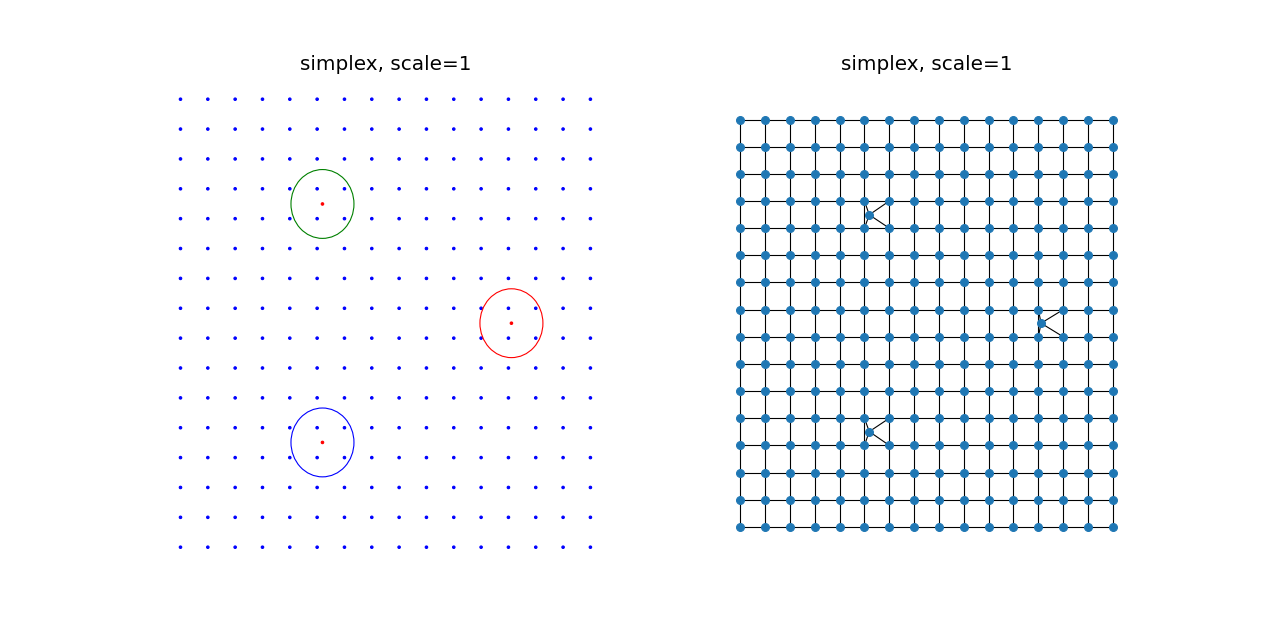

In [64]:
# Visualization anchors vs beacons
anchor_structure = 'simplex'
scale = 1
graph = 'Grid2d'
anchor_colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'w']

fig_avb = plt.figure(figsize=(16, 8), dpi=80)
fig_avb.tight_layout()
ax_anchor1 = fig_avb.add_subplot(121)
ax_anchor2 = fig_avb.add_subplot(122)
target_coord, edge_index, anchor_coords = get_geometric_graph(graph, anchor_structure=anchor_structure, anchor_dist=0.25, anchor_scale=scale)
coord2scatter(target_coord, title=f'{anchor_structure}, scale={scale}', transparent=True, zero_center=False, show_anchors=True, n_anchors=anchor_coords.size(0), ax=ax_anchor1)
# Draw circles with radius 0.25 around all anchors over ax_anchor1
for i, anchor_coord in enumerate(anchor_coords):
    print(anchor_coord)
    circle = plt.Circle(anchor_coord, 0.25, color=anchor_colors[i], fill=False)
    ax_anchor1.add_artist(circle)

plot_edge_index(edge_index, coord=target_coord, title='simplex, scale=1', ax=ax_anchor2)

In [148]:
def find_best_permutation(coord_1: torch.Tensor, coord_2: torch.Tensor, projections=128):
    if coord_1.ndim == 2:
        coord_1 = coord_1.unsqueeze(0)
        coord_2 = coord_2.unsqueeze(0)
    assert coord_1.size(0) == coord_2.size(0) and coord_1.size(-1) == coord_2.size(-1)

    print(coord_1.size(), coord_2.size())

    proj = torch.nn.functional.normalize(torch.randn(coord_1.size(0), coord_1.size(2), 128, dtype=coord_1.dtype).to(coord_1.device), dim=1)
    projected_1 = torch.bmm(coord_1, proj).permute(0, 2, 1)[0]
    projected_2 = torch.bmm(coord_2, proj).permute(0, 2, 1)[0]

    print(projected_1.size(), projected_2.size())
    
    sort_1 = torch.argsort(projected_1, dim=-1)
    sort_2 = torch.argsort(projected_2, dim=-1)
    print(sort_1.size(), sort_2.size())
    sort_2_inv = torch.argsort(sort_2, dim=-1)
    print(sort_2_inv.size())
    sort_1 = sort_1.gather(1, sort_2_inv)
    print(sort_1.size())

    best_perm = None
    best_cost = float('inf')
    for perm in sort_1.unique(dim=0):
        cost = torch.norm(projected_1 - projected_2[:, perm], dim=-1).mean()
        if cost < best_cost:
            best_perm = perm
            best_cost = cost

    return best_perm, best_cost

In [157]:
perm, cost = find_best_permutation(model.init_coord, model.target_coord, 1024)

torch.Size([1, 256, 2]) torch.Size([1, 256, 2])
torch.Size([128, 256]) torch.Size([128, 256])
torch.Size([128, 256]) torch.Size([128, 256])
torch.Size([128, 256])
torch.Size([128, 256])


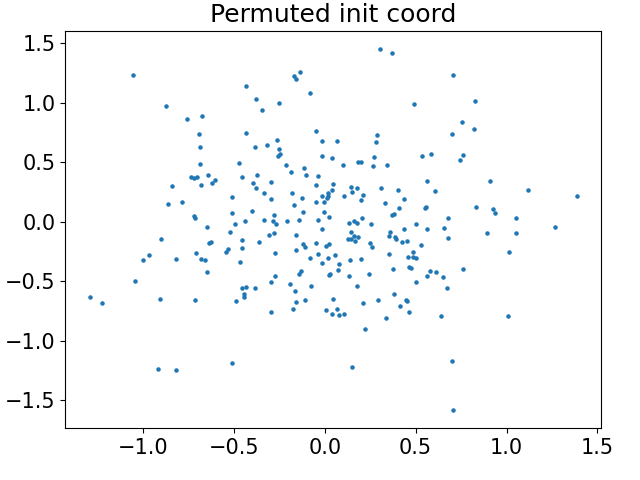

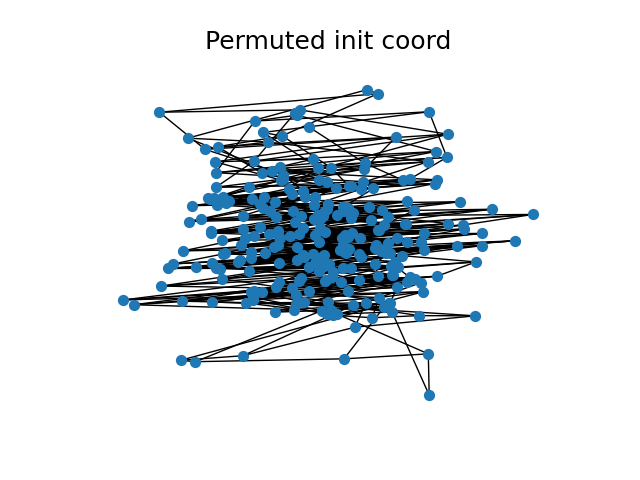

In [158]:
permuted_init_coord = model.init_coord.clone()[perm]
coord2scatter(permuted_init_coord, title='Permuted init coord')
plot_edge_index(model.edge_index, coord=permuted_init_coord, title='Permuted init coord')

In [139]:
import torch
import math
import itertools

angle = torch.pi / 8

coord_1 = torch.Tensor([[0, 0], [0, 1], [1, 0], [1, 1]]) * 2 - 1
# coord_2 = torch.Tensor([[0, 0], [1, 0], [0, 1], [1, 1]]) * 2 - 1
# rotation_matrix = torch.Tensor([[math.cos(angle), -math.sin(angle)],
#                                 [math.sin(angle), math.cos(angle)]])
# coord_2 = torch.matmul(rotation_matrix, coord_2.T).T
coord_2 = torch.Tensor([[0, 0], [1, 0], [0, 1], [1, 1]]) * 2 - 1
# print(coord_1, coord_2)

if coord_1.ndim == 2:
    coord_1 = coord_1.unsqueeze(0)
    coord_2 = coord_2.unsqueeze(0)
assert coord_1.size(0) == coord_2.size(0) and coord_1.size(-1) == coord_2.size(-1)
    
proj = torch.nn.functional.normalize(
    torch.randn(coord_1.size(0), coord_1.size(2), 128, dtype=coord_1.dtype).to(coord_1.device), dim=1)
sort_1 = torch.argsort(torch.bmm(coord_1, proj).permute(0, 2, 1), dim=-1)[0]
print(sort_1.shape)
sort_2 = torch.argsort(torch.bmm(coord_2, proj).permute(0, 2, 1), dim=-1)[0]
sort_2_inv = torch.argsort(sort_2, dim=-1)
print(sort_2_inv.shape)
sort_1 = sort_1.gather(1, sort_2_inv)
# if proj_1.size(-1) != proj_2.size(-1):
#     proj_2 = torch.nn.functional.interpolate(proj_2, proj_1.size(-1), mode='nearest')


projected_1 = torch.bmm(coord_1, proj).permute(0, 2, 1)[0]
projected_2 = torch.bmm(coord_2, proj).permute(0, 2, 1)[0]

# print(projected_2.shape)

print(sort_1.shape)
print('hoi')
print(sort_1.unique(dim=0))

# Calculate the best permutation of the projected coordinates
best_perm = None
best_cost = float('inf')
for perm in sort_1.unique(dim=0):
    # print(perm)
    cost = torch.norm(projected_1 - projected_2[:, perm], dim=-1).mean()
    if cost < best_cost:
        best_perm = perm
        best_cost = cost

best_perm, best_cost

torch.Size([128, 4])
torch.Size([128, 4])
torch.Size([128, 4])
hoi
tensor([[0, 2, 1, 3]])


(tensor([0, 2, 1, 3]), tensor(0.))

In [130]:
a = torch.Tensor([[0, 0], [1, 0], [0, 1], [1, 1]])
ind = torch.Tensor([[0, 1], [0, 0], [1, 0], [0, 1]]).long()
a.gather(1, ind)

tensor([[0., 0.],
        [1., 1.],
        [1., 0.],
        [1., 1.]])

In [113]:
for _ in range(10000):
    a = torch.rand(4)
    b = torch.rand(4)
    sort_a = torch.argsort(a)
    sort_b = torch.argsort(b)
    inv_sort_b = torch.argsort(sort_b)
    d = torch.norm(a[sort_a] - b[sort_b])
    d2 = torch.norm(a[sort_a[inv_sort_b]] - b)
    if not torch.isclose(d, d2):
        print(a, b, a[sort_a][inv_sort_b], d, d2)
        break

In [97]:
proj_1[0], proj_2[0]

(tensor([2, 0, 3, 1]), tensor([2, 3, 0, 1]))

In [14]:
proj_2 != proj_1

tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False],
        [False, False, False, False],
        [False,  True,  True, False],
        [False, False, False, False],
        [ True,  True,  True,  True],
        [False,  True,  True, False],
        [False, False, False, False],
        [False,  True,  True, False],
        [False, False, False, False],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True],
        [False, False, False, False],
        [False, False, False, False],
        [False,  True,  True, False],
        [False, False, False, False],
        [False, False, False, False],
        [ True,  True,  True,  True],
        [False,  True,  True, False],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True],
        [False, False, False, False],
        [False, False, False, False],
        [ True,  True,  True,  True],
        [False,  True,  True, False],
        [Fal

In [13]:
proj_1

tensor([[2, 3, 0, 1],
        [0, 2, 1, 3],
        [1, 3, 0, 2],
        [0, 2, 1, 3],
        [1, 3, 0, 2],
        [1, 3, 0, 2],
        [0, 2, 1, 3],
        [2, 0, 3, 1],
        [1, 3, 0, 2],
        [3, 2, 1, 0],
        [0, 1, 2, 3],
        [1, 0, 3, 2],
        [2, 3, 0, 1],
        [2, 0, 3, 1],
        [1, 3, 0, 2],
        [0, 1, 2, 3],
        [0, 2, 1, 3],
        [3, 2, 1, 0],
        [3, 1, 2, 0],
        [0, 1, 2, 3],
        [2, 3, 0, 1],
        [1, 0, 3, 2],
        [3, 1, 2, 0],
        [3, 2, 1, 0],
        [2, 3, 0, 1],
        [2, 0, 3, 1],
        [2, 0, 3, 1],
        [2, 0, 3, 1],
        [0, 1, 2, 3],
        [2, 0, 3, 1],
        [1, 0, 3, 2],
        [2, 0, 3, 1],
        [0, 1, 2, 3],
        [1, 0, 3, 2],
        [3, 1, 2, 0],
        [0, 2, 1, 3],
        [0, 2, 1, 3],
        [3, 2, 1, 0],
        [2, 0, 3, 1],
        [3, 1, 2, 0],
        [3, 2, 1, 0],
        [2, 3, 0, 1],
        [1, 3, 0, 2],
        [0, 2, 1, 3],
        [1, 3, 0, 2],
        [3

In [32]:
import matplotlib

def generate_viz(model, path, steps=25):
    (coord, _, edge_index) = model.eval(init_coord=None, n_steps=steps, rotate=False, return_inter_states=False, dtype=torch.float64)
    coord_dim = coord.size(-1)
    fig = plt.figure(figsize=(8, 8), dpi=80)
    fig.tight_layout()
    ax = fig.add_subplot(projection='3d' if coord_dim == 3 else None)
    plot_edge_index(edge_index, coord=coord, title='50 steps', ax=ax)
    plt.savefig(path, dpi=300)
    matplotlib.pyplot.close()

In [46]:
import matplotlib
matplotlib.pyplot.close()

In [38]:
path = '../log/experiment-resultss'
device = 'cuda' if torch.cuda.is_available() else 'cpu'

n_steps = 25

for version in tqdm(os.listdir(path)):
    version_path = os.path.join(path, version)
    # print(version_path)
    if os.path.isdir(version_path):
        subpaths = os.listdir(version_path)
        if 'version_0' in subpaths:
            version_paths = [os.path.join(version_path, subpath) for subpath in subpaths]
        else:
            version_paths = [version_path]
        for version_path in version_paths:
            model_path = os.path.join(version_path, 'checkpoints')
            version_path = version_path 
            if not os.path.exists(model_path):
                print(f'Skipping {model_path}')
                continue
            viz_path = f'{version_path}-{n_steps}.png'
            if os.path.exists(viz_path):
                print(f'Skipping {viz_path}, already created')
                continue
            print(model_path)
            checkpoints = os.listdir(model_path)
            checkpoints = [ckpt for ckpt in checkpoints if 'best_model' in ckpt]
            if len(checkpoints) == 0:
                continue
            checkpoints = checkpoints[0]
            model_path = os.path.join(model_path, checkpoints)
            try:
                model = FixedTargetGAE.load_from_checkpoint(model_path).to(device)
                generate_viz(model, viz_path, n_steps)
                print(f'Created {viz_path}')
                del model
            except Exception as e:
                print(f'\nModel {model_path} can\'t be loaded ({e}). Skipping...')

Skipping ../log/experiment-resultss\-ds a -bsc 0 8 2000 16 -l ot_p -apd -bc -as corners -re -en 4 -de -des 5 --seed 42\version_0-25.png, already created
Skipping ../log/experiment-resultss\-ds a -bsc 0 8 2000 16 -l ot_p -apd -bc -as corners -re -en 4 -de -des 5 --seed 42\version_0-25.png\checkpoints
Skipping ../log/experiment-resultss\-ds a -bsc 0 8 2000 16 -l ot_p -apd -bc -as corners -re -en 4 -de -des 5 --seed 42\version_0.png\checkpoints
Skipping ../log/experiment-resultss\-ds a -bsc 0 8 2000 16 -l ot_p -apd -bc -as corners -re -en 8 -me 4 -ed 0.15 -de -des 5 --seed 42\version_0-25.png, already created
Skipping ../log/experiment-resultss\-ds a -bsc 0 8 2000 16 -l ot_p -apd -bc -as corners -re -en 8 -me 4 -ed 0.15 -de -des 5 --seed 42\version_0-25.png\checkpoints
Skipping ../log/experiment-resultss\-ds a -bsc 0 8 2000 16 -l ot_p -apd -bc -as corners -re -en 8 -me 4 -ed 0.15 -de -des 5 --seed 42\version_0.png\checkpoints
Skipping ../log/experiment-resultss\-ds a -bsc 0 8 2000 16 -l o

100%|██████████| 25/25 [00:00<00:00, 31.65it/s]


Created ../log/experiment-resultss\-ds Cube -bsc 0 8 -l ot_p -pd 0.2 -bc -as corners -an -re -de -en 12 -me 6 -ed 0.15 -des 5 --seed 123 -nt nn\version_0-25.png
../log/experiment-resultss\-ds Cube -bsc 0 8 -l ot_p -pd 0.2 -bc -as corners -an -re -de -en 6 -me 4 -ed 0.15 -des 5 --seed 123 -nt nn\version_0\checkpoints


100%|██████████| 25/25 [00:00<00:00, 34.13it/s]


Created ../log/experiment-resultss\-ds Cube -bsc 0 8 -l ot_p -pd 0.2 -bc -as corners -an -re -de -en 6 -me 4 -ed 0.15 -des 5 --seed 123 -nt nn\version_0-25.png
Skipping ../log/experiment-resultss\-ds Cube -bsc 0 8 -l ot_p -pd 0.2 -bc -as corners -an -re -de -en 6 -me 4 -ed 0.15 -des 5 --seed 123 -nt nn\version_0.png\checkpoints
Skipping ../log/experiment-resultss\-ds Cube -bsc 0 8 -l ot_p -pd 0.2 -bc -as corners -re -de -en 12 -me 6 -ed 0.15 -des 5 --seed 42\version_0-25.png, already created
Skipping ../log/experiment-resultss\-ds Cube -bsc 0 8 -l ot_p -pd 0.2 -bc -as corners -re -de -en 12 -me 6 -ed 0.15 -des 5 --seed 42\version_0-25.png\checkpoints
../log/experiment-resultss\-ds Cube -bsc 0 8 -l ot_p -pd 0.2 -bc -as corners -re -de -en 6 -me 6 -ed 0.15 -des 5 --seed 42\version_0\checkpoints


100%|██████████| 25/25 [00:00<00:00, 56.69it/s]


Created ../log/experiment-resultss\-ds Cube -bsc 0 8 -l ot_p -pd 0.2 -bc -as corners -re -de -en 6 -me 6 -ed 0.15 -des 5 --seed 42\version_0-25.png
Skipping ../log/experiment-resultss\-ds Cube -bsc 0 8 -l ot_p -pd 0.2 -bc -as corners -re -de -en 6 -me 6 -ed 0.15 -des 5 --seed 42\version_0.png\checkpoints
../log/experiment-resultss\-ds Cube -bsc 0 8 -l ot_p -pd 0.2 -bc -as simplex -an -re -de -en 12 -me 6 -ed 0.15 -des 5 --seed 42\version_0\checkpoints


100%|██████████| 25/25 [00:01<00:00, 24.46it/s]


Created ../log/experiment-resultss\-ds Cube -bsc 0 8 -l ot_p -pd 0.2 -bc -as simplex -an -re -de -en 12 -me 6 -ed 0.15 -des 5 --seed 42\version_0-25.png
../log/experiment-resultss\-ds Cube -bsc 0 8 -l ot_p -pd 0.2 -bc -as simplex -an -re -de -en 6 -me 6 -ed 0.15 -des 5 --seed 42\version_0\checkpoints


100%|██████████| 25/25 [00:01<00:00, 23.33it/s]


Created ../log/experiment-resultss\-ds Cube -bsc 0 8 -l ot_p -pd 0.2 -bc -as simplex -an -re -de -en 6 -me 6 -ed 0.15 -des 5 --seed 42\version_0-25.png
../log/experiment-resultss\-ds Cube -bsc 0 8 -l ot_p -pd 0.2 -bc -as simplex -an -re -de -en 6 -me 6 -ed 0.15 -des 5 --seed 42\version_1\checkpoints


100%|██████████| 25/25 [00:00<00:00, 25.35it/s]


Created ../log/experiment-resultss\-ds Cube -bsc 0 8 -l ot_p -pd 0.2 -bc -as simplex -an -re -de -en 6 -me 6 -ed 0.15 -des 5 --seed 42\version_1-25.png
../log/experiment-resultss\-ds Cube -bsc 0 8 -l ot_p -pd 0.2 -bc -as simplex -re -de -en 6 -me 6 -ed 0.15 -des 5 --seed 42\version_0\checkpoints


100%|██████████| 25/25 [00:00<00:00, 73.85it/s]


Created ../log/experiment-resultss\-ds Cube -bsc 0 8 -l ot_p -pd 0.2 -bc -as simplex -re -de -en 6 -me 6 -ed 0.15 -des 5 --seed 42\version_0-25.png
Skipping ../log/experiment-resultss\-ds Cube -bsc 0 8 -l ot_p -pd 0.2 -bc -as simplex -re -de -en 6 -me 6 -ed 0.15 -des 5 --seed 42\version_0.png\checkpoints
../log/experiment-resultss\-ds Cube -sdg 0.05 -rdg 1.0 -bsc 0 2 -l local_enp -pd 0.2 -ss -as corners -ad 0.15 -asc 0.5 -an --seed 42\version_0\checkpoints

Model ../log/experiment-resultss\-ds Cube -sdg 0.05 -rdg 1.0 -bsc 0 2 -l local_enp -pd 0.2 -ss -as corners -ad 0.15 -asc 0.5 -an --seed 42\version_0\checkpoints\best_model-step=12754.ckpt can't be loaded (Error(s) in loading state_dict for FixedTargetGAE:
	Unexpected key(s) in state_dict: "encoder.anchor_coords". ). Skipping...
Skipping ../log/experiment-resultss\-ds Cube -sdg 0.05 -rdg 1.0 -bsc 0 2 -l local_enp -pd 0.2 -ss -as corners -ad 0.15 -asc 0.5 -an --seed 42\version_0.png\checkpoints
../log/experiment-resultss\-ds Cube -sdg

100%|██████████| 25/25 [00:00<00:00, 44.09it/s]


Created ../log/experiment-resultss\-ds Grid2d -bsc 0 8 2000 16 4000 32 -l ot_p -apd -an -bc -as simplex -re -de -en 4 -des 5 --seed 42\version_0-25.png
../log/experiment-resultss\-ds Grid2d -bsc 0 8 2000 16 4000 32 -l ot_p -apd -an -bc -as simplex -re -de -en 4 -des 5 --seed 42 -nt nn\version_0\checkpoints


100%|██████████| 25/25 [00:00<00:00, 53.08it/s]


Created ../log/experiment-resultss\-ds Grid2d -bsc 0 8 2000 16 4000 32 -l ot_p -apd -an -bc -as simplex -re -de -en 4 -des 5 --seed 42 -nt nn\version_0-25.png
../log/experiment-resultss\-ds Grid2d -bsc 0 8 2000 16 4000 32 -l ot_p -apd -an -ffa -bc -as simplex -re -de -en 4 -des 5 --seed 42\version_0\checkpoints


100%|██████████| 25/25 [00:00<00:00, 28.85it/s]


Created ../log/experiment-resultss\-ds Grid2d -bsc 0 8 2000 16 4000 32 -l ot_p -apd -an -ffa -bc -as simplex -re -de -en 4 -des 5 --seed 42\version_0-25.png
../log/experiment-resultss\-ds Grid2d -bsc 0 8 2000 16 4000 32 -l ot_p -apd -an -ffa -bc -as simplex -re -de -en 4 -des 5 --seed 42\version_1\checkpoints


100%|██████████| 25/25 [00:01<00:00, 17.22it/s]


Created ../log/experiment-resultss\-ds Grid2d -bsc 0 8 2000 16 4000 32 -l ot_p -apd -an -ffa -bc -as simplex -re -de -en 4 -des 5 --seed 42\version_1-25.png
../log/experiment-resultss\-ds Grid2d -bsc 0 8 2000 16 4000 32 -l ot_p -apd -an -ffa -bc -as simplex -re -de -en 4 -des 5 --seed 42 -nt nn\version_0\checkpoints


100%|██████████| 25/25 [00:01<00:00, 15.27it/s]


Created ../log/experiment-resultss\-ds Grid2d -bsc 0 8 2000 16 4000 32 -l ot_p -apd -an -ffa -bc -as simplex -re -de -en 4 -des 5 --seed 42 -nt nn\version_0-25.png
Skipping ../log/experiment-resultss\-ds Grid2d -bsc 0 8 2000 16 4000 32 -l ot_p -apd -bc -as simplex --seed 42\version_0-25.png, already created
Skipping ../log/experiment-resultss\-ds Grid2d -bsc 0 8 2000 16 4000 32 -l ot_p -apd -bc -as simplex --seed 42\version_0-25.png\checkpoints
Skipping ../log/experiment-resultss\-ds Grid2d -bsc 0 8 2000 16 4000 32 -l ot_p -apd -bc -as simplex --seed 42\version_0.png\checkpoints
Skipping ../log/experiment-resultss\-ds Grid2d -bsc 0 8 2000 16 4000 32 -l ot_p -apd -bc -as simplex -otp --seed 42 -ric\version_0-25.png, already created
Skipping ../log/experiment-resultss\-ds Grid2d -bsc 0 8 2000 16 4000 32 -l ot_p -apd -bc -as simplex -otp --seed 42 -ric\version_0-25.png\checkpoints
Skipping ../log/experiment-resultss\-ds Grid2d -bsc 0 8 2000 16 4000 32 -l ot_p -apd -bc -as simplex -otp --s

100%|██████████| 25/25 [00:00<00:00, 31.85it/s]


Created ../log/experiment-resultss\-ds Grid2d -bsc 0 8 2000 16 4000 32 -l ot_p -apd -bc -as simplex -re -de -en 4 -des 5 --seed 42 -nt nn\version_0-25.png
Skipping ../log/experiment-resultss\-ds Grid2d -bsc 0 8 2000 16 4000 32 -l ot_p -apd -bc -as simplex -re -de -en 8 -me 4 -ed 0.3 -des 5 --seed 42\version_0-25.png, already created
Skipping ../log/experiment-resultss\-ds Grid2d -bsc 0 8 2000 16 4000 32 -l ot_p -apd -bc -as simplex -re -de -en 8 -me 4 -ed 0.3 -des 5 --seed 42\version_0-25.png\checkpoints
Skipping ../log/experiment-resultss\-ds Grid2d -bsc 0 8 2000 16 4000 32 -l ot_p -apd -bc -as simplex -re -de -en 8 -me 4 -ed 0.3 -des 5 --seed 42\version_0.png\checkpoints
../log/experiment-resultss\-ds Grid2d -bsc 0 8 2000 16 4000 32 -l ot_p -pd 0.3 -bc -as simplex -re -de -en 4 -des 5 --seed 42 -nt nn\version_0\checkpoints


100%|██████████| 25/25 [00:00<00:00, 63.45it/s]


Created ../log/experiment-resultss\-ds Grid2d -bsc 0 8 2000 16 4000 32 -l ot_p -pd 0.3 -bc -as simplex -re -de -en 4 -des 5 --seed 42 -nt nn\version_0-25.png
Skipping ../log/experiment-resultss\-ds Grid2d -bsc 0 8 2000 16 4000 32 -l ot_p -pd 0.3 -bc -as simplex -re -de -en 4 -des 5 --seed 42 -nt nn\version_0.png\checkpoints
Skipping ../log/experiment-resultss\-ds Grid2d -bsc 0 8 2000 16 4000 32 -l ot_p -pd 0.35 -bc -as simplex --seed 42\version_0-25.png, already created
Skipping ../log/experiment-resultss\-ds Grid2d -bsc 0 8 2000 16 4000 32 -l ot_p -pd 0.35 -bc -as simplex --seed 42\version_0-25.png\checkpoints
Skipping ../log/experiment-resultss\-ds Grid2d -bsc 0 8 2000 16 4000 32 -l ot_p -pd 0.35 -bc -as simplex --seed 42\version_0.png\checkpoints
Skipping ../log/experiment-resultss\-ds Grid2d -bsc 0 8 2000 16 4000 32 -l ot_p -pd 0.35 -bc -as simplex --seed 42\version_1\checkpoints
Skipping ../log/experiment-resultss\-ds Grid2d -bsc 0 8 2000 16 4000 32 -l ot_p -pd 0.35 -bc -as simple

100%|██████████| 25/25 [00:00<00:00, 32.36it/s]


Created ../log/experiment-resultss\-ds Grid2d -bsc 0 8 2000 16 4000 32 -l ot_p -pd 0.4 -bc -as simplex -re -de -en 4 -des 5 --seed 42 -nt nn\version_0-25.png
Skipping ../log/experiment-resultss\-ds Grid2d -bsc 0 8 2000 16 4000 32 -l ot_p -pd 0.4 -bc -as simplex -re -de -en 4 -des 5 --seed 42 -nt nn\version_0.png\checkpoints
Skipping ../log/experiment-resultss\-ds Grid2d -bsc 0 8 2000 16 4000 32 -l ot_p -pd 0.5 -an -bc -as simplex -re -de -en 4 -des 5 --seed 42\version_0-25.png, already created
Skipping ../log/experiment-resultss\-ds Grid2d -bsc 0 8 2000 16 4000 32 -l ot_p -pd 0.5 -an -bc -as simplex -re -de -en 4 -des 5 --seed 42\version_0-25.png\checkpoints
Skipping ../log/experiment-resultss\-ds Grid2d -bsc 0 8 2000 16 4000 32 -l ot_p -pd 0.5 -an -bc -as simplex -re -de -en 4 -des 5 --seed 42\version_0.png\checkpoints
Skipping ../log/experiment-resultss\-ds Grid2d -bsc 0 8 2000 16 4000 32 -l ot_p -pd 0.5 -an -bc -as simplex -re -de -en 4 -des 5 --seed 42\version_1-25.png, already cre

100%|██████████| 25/25 [00:00<00:00, 60.90it/s]


Created ../log/experiment-resultss\-ds Grid2d -bsc 0 8 2000 16 4000 32 -l ot_p -pd 0.5 -bc -as simplex -re -de -en 4 -des 5 --seed 42 -nt nn\version_0-25.png
Skipping ../log/experiment-resultss\-ds Grid2d -bsc 0 8 2000 16 4000 32 -l ot_p -pd 0.5 -bc -as simplex -re -de -en 4 -des 5 -nt nn\version_0-25.png, already created
Skipping ../log/experiment-resultss\-ds Grid2d -bsc 0 8 2000 16 4000 32 -l ot_p -pd 0.5 -bc -as simplex -re -de -en 4 -des 5 -nt nn\version_0-25.png\checkpoints
Skipping ../log/experiment-resultss\-ds Grid2d -bsc 0 8 2000 16 4000 32 -l ot_p -pd 0.5 -bc -as simplex -re -de -en 4 -des 5 -nt nn\version_0.png\checkpoints
Skipping ../log/experiment-resultss\-ds Grid2d -bsc 0 8 2000 16 4000 32 -l ot_p -pd 0.5 -bc -as simplex -re -de -en 4 -des 5 -nt nn\version_1-25.png, already created
Skipping ../log/experiment-resultss\-ds Grid2d -bsc 0 8 2000 16 4000 32 -l ot_p -pd 0.5 -bc -as simplex -re -de -en 4 -des 5 -nt nn\version_1-25.png\checkpoints
Skipping ../log/experiment-res

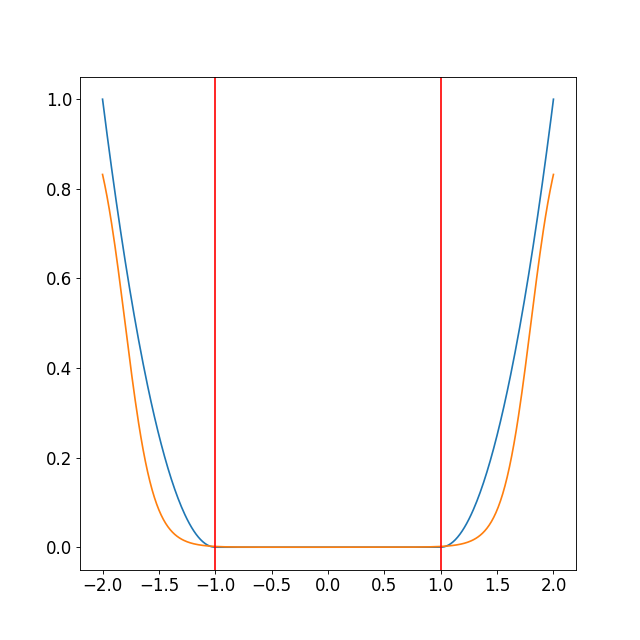

In [131]:
reload(utils.utils)
from utils.utils import RangeLoss

width = 200
fig = plt.figure(figsize=(8, 8), dpi=80)
fig.tight_layout()
ax = fig.add_subplot()
ax.clear()

min = -1
max = 1


range_loss = RangeLoss(min, max)
y = [range_loss(torch.tensor(i / 100.0), None) for i in range(-width, width + 1)]
ax.plot([i / 100.0 for i in range(-width, width+1)], y)

x = torch.Tensor(list(range(-200, 201))) / 100
sigmoid = torch.nn.Sigmoid()
shift = 0.8
mult = 8
y = sigmoid((x - shift - max) * mult) + sigmoid((x + shift - min) * -mult)
ax.plot([i / 100.0 for i in range(-width, width+1)], y)

# Draw a vertical line at min and max
ax.axvline(min, color='r')
ax.axvline(max, color='r')

fig.savefig('range_loss.png', dpi=300)

In [174]:
reload(utils.utils)
from utils.utils import compute_edge_index, triplets

In [198]:
coords = torch.Tensor([[0, 0], [0, 1], [1, 0], [1, 1], [0.5, 2], [2, 0.5], [0, 0], [0, 1], [1, 0], [1, 1], [-1, 0.5], [0.5, -1]])
n_nodes = torch.LongTensor([len(coords) / 2, len(coords) / 2])
print(coords.shape)
edge_index = compute_edge_index(None, coords, n_nodes, True, False, 1, n_anchors=2, anchor_distance=5)
edge_index

torch.Size([12, 2])


C:\Users\20191934\AppData\Local\Temp\ipykernel_26784\2481158998.py:2: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  n_nodes = torch.LongTensor([len(coords) / 2, len(coords) / 2])


EdgeIndex([[ 0,  0,  1,  1,  2,  2,  3,  3,  6,  6,  7,  7,  8,  8,  9,  9,  0,
             0,  1,  1,  2,  2,  3,  3,  6,  6,  7,  7,  8,  8,  9,  9],
           [ 1,  2,  0,  3,  0,  3,  1,  2,  7,  8,  6,  9,  6,  9,  7,  8,  4,
             5,  4,  5,  4,  5,  4,  5, 10, 11, 10, 11, 10, 11, 10, 11]],
          nnz=32)

In [200]:
n_nodes

tensor([6, 6])

In [201]:
tr = triplets(edge_index, n_nodes.sum())
print(tr[0].shape)
tr

torch.Size([96])


(tensor([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
         6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9,
         0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
         6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9]),
 tensor([ 1,  1,  1,  2,  2,  2,  0,  0,  0,  3,  3,  3,  0,  0,  0,  3,  3,  3,
          1,  1,  1,  2,  2,  2,  7,  7,  7,  8,  8,  8,  6,  6,  6,  9,  9,  9,
          6,  6,  6,  9,  9,  9,  7,  7,  7,  8,  8,  8,  4,  4,  4,  5,  5,  5,
          4,  4,  4,  5,  5,  5,  4,  4,  4,  5,  5,  5,  4,  4,  4,  5,  5,  5,
         10, 10, 10, 11, 11, 11, 10, 10, 10, 11, 11, 11, 10, 10, 10, 11, 11, 11,
         10, 10, 10, 11, 11, 11]),
 tensor([ 2,  4,  5,  1,  4,  5,  3,  4,  5,  0,  4,  5,  3,  4,  5,  0,  4,  5,
          2,  4,  5,  1,  4,  5,  8, 10, 11,  7, 10, 11,  9, 10, 11,  6, 10, 11,
          9, 10, 11,  6, 10, 11,  8, 10, 11,  7, 10, 11,  1,  2,  5,  1,

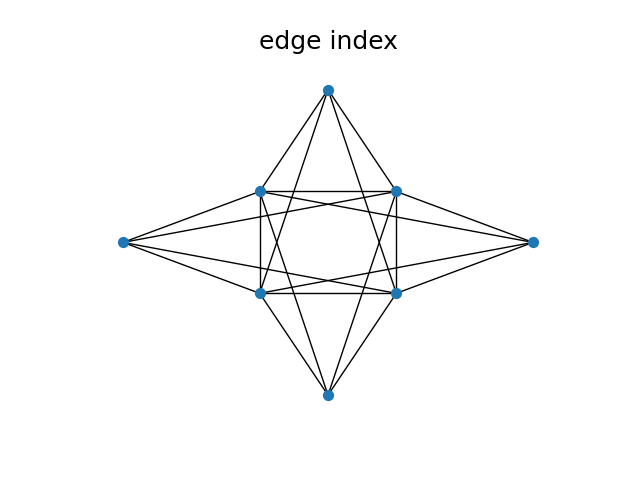

In [191]:
plot_edge_index(edge_index, coord=coords, title='edge index')